# Best Markets for Advertising

Suppose we are data analysts for an online e-learning company that specializes in programming courses. We cover domains such as data science and game development, but our primary focus is web and mobile development. Our goal is to promote our products and invest money in more advertisement, but to do that we need to know what markets to advertise in. We ultiized three surveys related to programming/web development from FreeCodeCamp and Stack Overflow. 

These surveys were conducted online by participants worldwide in 2016, 2017, and 2018. FreeCodeCamp's surveys targeted new programmers and asked many questions related to career interest, income expectations, age, gender, home country, time spent programming, and so on. Stack Overflow's 2018 survey was aimed primarily at individuals already in the developer community concerning topics from favorite technologies to job preferences. 

We discovered that new programmers are interested in a wide variety of career fields to include web development, data science, data engineering, game development, QA engineering, machine learning, and many other careers. We found that the primary motivator for their programming journey was to advance their income and career opportunities. With this knowledge, we need to ensure that our courses stay up to date, relevant, and beneficial for our customers.

Most importantly, after exploring the surveys we discovered that the two best potential countries to invest our advertising in were the United States and India. Both countries had the highest number of survey participants, which indicates that most new programmers are presumably most numerous in these two countries. Secondly, The US has the highest average monthly spending for programming education, whereas India has a lower average spending. However, India's average monthly spending is still around the same amount as our monthly subscription (\$59 US dollars per month).

In short, the two best markets for advertising include the United States and India, we recommend to the marketing team to focus their efforts into these two regions.

We want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

* Where are these new coders located.
* What are the locations with the greatest number of new coders.
* How much money new coders are willing to spend on learning.


FreeCodeCamp Survey:
*https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969*

Github repository:
Survey Year 2017: *https://github.com/freeCodeCamp/2017-new-coder-survey/tree/master/clean-data* 

Survey Year 2016: *https://github.com/freeCodeCamp/2016-new-coder-survey#about-the-data* 

Stack Overflow Survey:
*https://www.kaggle.com/datasets/stackoverflow/stack-overflow-2018-developer-survey*

Some limitations for analyzing survey data:
- For some questions, participants had the freedom to write in their own responses; this makes it difficult to properly every single response into unique values due to spelling, grammar, punctuation, and word usage, however we have done our best to clean some of these columns
- Almost all columns have missing data, participants were able to leave questions blank if they did not want to answer a particular question; this makes it impossible to get a completely accurate analysis of all the data



Method
* Load datasets
* Clean dataframes, including standardizing any columns if needed
* Concatenate/merge datasets
* Correct any remaining inconsistencies/errors
* Perform analysis and visualization



In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
#style.use("fivethirtyeight")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
pd.options.display.max_columns = 150 # to avoid truncated output 
csv = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory= False)
csv2016 = pd.read_csv("2016-fCC-New-Coders-Survey-Data.csv", low_memory = False)
exchange = pd.read_csv("survey_results_public.csv", low_memory= False)
salaries = pd.read_csv("Levels_Fyi_Salary_Data.csv")

In [3]:
csv.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.00,0.00,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.00,0.00,1.00,0.00,0.00,0.00,NaN,15.00,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.00,6.00,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.00,0.00,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,"35,000.00",NaN,NaN,male,NaN,NaN,1.00,0.00,1.00,0.00,0.00,1.00,NaN,10.00,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.00,0.00,0.00,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.00,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.00,6.00,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,1.00,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,1.00,1.00,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.00,0.00,Na

In [4]:
exchange.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.00,7.00,8.00,1.00,2.00,5.00,3.00,4.00,9.00,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,1.00,4.00,2.00,5.00,5.00,6.00,7.00,2.00,1.00,4.00,3.00,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.00,5.00,4.00,7.00,2.00,6.00,3.00,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate lengt

## Data Processing and Cleaning

The first step in our analysis is to identify the appropriate columns that are relevant. Unfortunately there are over 100 columns which is far too many for a practical analysis.

We can use the json file from the author's github repository page to identify useful and irrelevant columns. Unfortunately it's a rather manual and tedious process and there are far too many columns to list for deletion. Instead we'll sequentially drop slices of columns since we cannot drop lists and slices at the same time using python code.

In [5]:
# Index location of the first set of columns to drop
print(csv.columns.get_loc("CodeEventConferences"))
print(csv.columns.get_loc("CodeEventWorkshops"))

8
23


In [6]:
# Drops columns
csv = csv.drop(csv.iloc[:, 8:23], axis=1)

In [7]:
# Index location of the next set of columns to drop
print(csv.columns.get_loc("NetworkID"))
print(csv.columns.get_loc("ResourceW3S"))

59
100


In [8]:
csv = csv.drop(csv.iloc[:, 59:100], axis=1)

In [9]:
print(csv.columns.get_loc("YouTubeCodeCourse"))

63


In [10]:
# Drop remaining columns including index postion 63 and onward
csv = csv.drop(csv.iloc[:, 63:], axis=1)
csv.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe
0,27.00,0.00,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.00,0.00,1.00,0.00,0.00,0.00,NaN,15.00,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.00,6.00,1.00,"some college credit, no degree",NaN,NaN
1,34.00,0.00,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,"35,000.00",NaN,NaN,male,NaN,NaN,1.00,0.00,1.00,0.00,0.00,1.00,NaN,10.00,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.00,0.00,0.00,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.00,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.00,6.00,1.00,"some college credit, no degree",NaN,NaN
2,21.00,0.00,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,"70,000.00",NaN,NaN,male,NaN,NaN,0.00,0.00,1.00,NaN,0.00,NaN,NaN,25.00,14f1863afa9c7de488050b82eb3edd96,21ba173828fbe9e27ccebaf4d5166a55,"13,000.00",1.00,0.00,0.00,0.00,Within 7 to 12 months,1.00,NaN,NaN,1.00,1.00,1.00,NaN,NaN,1.00,NaN,NaN,NaN,NaN,work for a medium-sized company,1.00,"Front-End Web Developer, Back-End Web Develo...",no preference,Spanish,"single, never married","1,000.00",5.00,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.00,0.00,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,I work from home,Brazil,Brazil,software development and IT,NaN,Employed for wages,NaN,"40,000.00",0.00,NaN,male,NaN,0.00,1.00,1.00,1.00,1.00,0.00,0.00,"40,000.00",14.00,91756eb4dc280062a541c25a3d44cfb0,3be37b558f02daae93a6da10f83f0c77,"24,000.00",0.00,0.00,0.00,1.00,Within the next 6 months,1.00,NaN,NaN,NaN,1.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a medium-sized company,NaN,"Front-End Web Developer, Full-Stack Web Deve...",from home,Portuguese,married or domestic partnership,0.00,5.00,NaN,"some college credit, no degree",NaN,NaN
4,20.00,0.00,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,Portugal,Portugal,NaN,NaN,Not working but looking for work,NaN,"140,000.00",NaN,NaN,female,NaN,NaN,0.00,0.00,1.00,NaN,0.00,NaN,NaN,10.00,aa3f061a1949a90b27bef7411ecd193f,d7c56bbf2c7b62096be9db010e86d96d,NaN,0.00,0.00,0.00,NaN,Within 7 to 12 months,1.00,NaN,NaN,NaN,1.00,1.00,NaN,1.00,1.00,NaN,NaN,NaN,NaN,work for a multinational corporation,1.00,"Full-Stack Web Developer, Information Security...",in an office with other developers,Portuguese,"single, never married",0.00,24.00,NaN,bachelor's degree,Information Technology,NaN


In [11]:
csv.iloc[:,:20]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender
0,27.00,0.00,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female
1,34.00,0.00,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,"35,000.00",NaN,NaN,male
2,21.00,0.00,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,"70,000.00",NaN,NaN,male
3,26.00,0.00,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,I work from home,Brazil,Brazil,software development and IT,NaN,Employed for wages,NaN,"40,000.00",0.00,NaN,male
4,20.00,0.00,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,Portugal,Portugal,NaN,NaN,Not working but looking for work,NaN,"140,000.00",NaN,NaN,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18170,41.00,0.00,NaN,NaN,NaN,NaN,1.00,more than 1 million,NaN,I work from home,Indonesia,Indonesia,software development and IT,NaN,Self-employed freelancer,NaN,NaN,0.00,NaN,male
18171,31.00,0.00,NaN,NaN,NaN,NaN,1.00,more than 1 million,NaN,Less than 15 minutes,Nigeria,Nigeria,transportation,NaN,Self-employed freelancer,NaN,"70,000.00",1.00,NaN,male
18172,39.00,0.00,NaN,NaN,NaN,NaN,3.00,more than 1 million,1.00,45 to 60 minutes,South Africa,South Africa,NaN,IT support and website update,Employed for wages,NaN,NaN,0.00,1.00,male
18173,54.00,0.00,NaN,NaN,NaN,NaN,3.00,"between 100,000 and 1 million",NaN,Less than 15 minutes,United Kingdom,United Kingdom,education,NaN,Employed for wages,NaN,NaN,0.00,NaN,male


If we utilize the following code below we'll get a better understanding of missing data in the columns. We expect for a lot of columns to be missing data, because there are likely many instances of respondents failing to enter information during the survey. 

In [12]:
#pd.set_option('display.max_rows', None)  # or 1000
series = csv.apply(pd.isnull).sum()/csv.shape[0] * 100

# Columns with less than or equal to 60% missing data points
list = series[series <= 60].index


In [13]:
print(series)

Age                                15.45
AttendedBootcamp                    2.56
BootcampFinish                     94.12
BootcampLoanYesNo                  94.06
BootcampName                       94.78
                            ...         
MonthsProgramming                   6.00
ResourceW3S                        46.27
SchoolDegree                       15.44
SchoolMajor                        51.98
StudentDebtOwe                     81.50
Length: 63, dtype: float64


In [14]:
# Converts the list of columns we want to use from pandas.index to list
cols_to_use = pd.Index.tolist(list)
cols_to_use.extend(["JobRoleInterest", "ExpectedEarning"])

# Isolates the dataframe down to only preferred columns
csv = csv[cols_to_use]

# Drop id.x and id.y columns
csv = csv.drop(columns=["ID.x","ID.y","ResourceW3S"])
csv

,Age,AttendedBootcamp,CityPopulation,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasServedInMilitary,HoursLearning,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobPref,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,JobRoleInterest,ExpectedEarning
0,27.00,0.00,more than 1 million,15 to 29 minutes,Canada,Canada,software development and IT,Employed for wages,female,1.00,0.00,1.00,0.00,15.00,NaN,NaN,0.00,0.00,0.00,NaN,start your own business,NaN,English,married or domestic partnership,150.00,6.00,"some college credit, no degree",NaN,NaN,NaN
1,34.00,0.00,"less than 100,000",NaN,United States of America,United States of America,NaN,Not working but looking for work,male,1.00,0.00,1.00,0.00,10.00,NaN,0.00,0.00,0.00,NaN,Within 7 to 12 months,work for a nonprofit,in an office with other developers,English,"single, never married",80.00,6.00,"some college credit, no degree",NaN,Full-Stack Web Developer,"35,000.00"
2,21.00,0.00,more than 1 million,15 to 29 minutes,United States of America,United States of America,software development and IT,Employed for wages,male,0.00,0.00,1.00,0.00,25.00,"13,000.00",1.00,0.00,0.00,0.00,Within 7 to 12 months,work for a medium-sized company,no preference,Spanish,"single, never married","1,000.00",5.00,high school diploma or equivalent (GED),NaN,"Front-End Web Developer, Back-End Web Develo...","70,000.00"
3,26.00,0.00,"between 100,000 and 1 million",I work from home,Brazil,Brazil,software development and IT,Employed for wages,male,1.00,1.00,1.00,0.00,14.00,"24,000.00",0.00,0.00,0.00,1.00,Within the next 6 months,work for a medium-sized company,from home,Portuguese,married or domestic partnership,0.00,5.00,"some college credit, no degree",NaN,"Front-End Web Developer, Full-Stack Web Deve...","40,000.00"
4,20.00,0.00,"between 100,000 and 1 million",NaN,Portugal,Portugal,NaN,Not working but looking for work,female,0.00,0.00,1.00,0.00,10.00,NaN,0.00,0.00,0.00,NaN,Within 7 to 12 months,work for a multinational corporation,in an office with other developers,Portuguese,"single, never married",0.00,24.00,bachelor's degree,Information Technology,"Full-Stack Web Developer, Information Security...","140,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18170,41.00,0.00,more than 1 million,I work from home,Indonesia,Indonesia,software development and IT,Self-employed freelancer,male,1.00,1.00,0.00,0.00,10.00,"60,000.00",0.00,0.00,0.00,0.00,NaN,start your own business,NaN,Indonesian,married or domestic partnership,10.00,1.00,bachelor's degree,Telecommunications Technician,NaN,NaN
18171,31.00,0.00,more than 1 million,Less than 15 minutes,Nigeria,Nigeria,transportation,Self-employed freelancer,male,1.00,1.00,0.00,0.00,1.00,"60,000.00",0.00,0.00,0.00,1.00,more than 12 months from now,work for a nonprofit,no preference,English,divorced,"10,000.00",1.00,high school diploma or equivalent (GED),NaN,"DevOps / SysAdmin, Mobile Developer, Pro...","70,000.00"
18172,39.00,0.00,more than 1 million,45 to 60 minutes,South Africa,South Africa,NaN,Employed for wages,male,1.00,1.00,0.00,0.00,10.00,"1,000,000.00",0.00,0.00,1.00,1.00,NaN,NaN,NaN,Zulu,married or domestic partnership,19.00,3.00,some high school,NaN,NaN,NaN
18173,54.00,0.00,"between 100,000 and 1 million",Less than 15 minutes,United Kingdom,United Kingdom,education,Employed for wages,male,0.00,1.00,1.00,0.00,1.00,"1,000,000.00",0.00,0.00,0.00,1.00,NaN,freelance,NaN,English,divorced,0.00,5.00,"trade, technical, or vocational training",NaN,NaN,NaN


In [15]:
# Count missing data
nulls = csv.apply(pd.isnull).sum()/csv.shape[0] * 100
nulls = nulls.sort_values()
nulls

IsSoftwareDev                                   0.59
AttendedBootcamp                                2.56
MonthsProgramming                               6.00
HoursLearning                                   8.04
MoneyForLearning                                8.79
Gender                                         14.97
CountryCitizen                                 15.37
HasHighSpdInternet                             15.38
SchoolDegree                                   15.44
Age                                            15.45
CityPopulation                                 15.52
LanguageAtHome                                 15.58
CountryLive                                    15.62
MaritalStatus                                  15.63
HasFinancialDependents                         15.66
IsEthnicMinority                               15.86
HasDebt                                        15.87
HasServedInMilitary                            16.06
IsReceiveDisabilitiesBenefits                 

In [16]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            15367 non-null  float64
 1   AttendedBootcamp               17709 non-null  float64
 2   CityPopulation                 15354 non-null  object 
 3   CommuteTime                    9246 non-null   object 
 4   CountryCitizen                 15382 non-null  object 
 5   CountryLive                    15336 non-null  object 
 6   EmploymentField                8116 non-null   object 
 7   EmploymentStatus               14345 non-null  object 
 8   Gender                         15454 non-null  object 
 9   HasDebt                        15291 non-null  float64
 10  HasFinancialDependents         15329 non-null  float64
 11  HasHighSpdInternet             15380 non-null  float64
 12  HasServedInMilitary            15256 non-null 

In [17]:
# New column to indicate year of survey completion
csv["Year"] = 2017
csv2016["Year"] = 2016

# Columns of interest
column_lists = csv.columns.to_list()
column_lists

# Apply column filtering to survey 2016
survey_2016 = csv2016[column_lists]

## Dataset merging

In [18]:
# Merge dataframes
combined_survey = pd.concat([csv, survey_2016])

Most of the courses offered on our e-learning platform are for web and mobile development. We need to identify if the sample from the dataset is representative of the population of new coders. However, only about 4 in 10 participants respondend to this question.

In [19]:
interests = combined_survey["JobRoleInterest"].value_counts(normalize=True) * 100
interests.head(20)

Full-Stack Web Developer                                                                     25.15
  Front-End Web Developer                                                                    13.55
Back-End Web Developer                                                                        6.27
  Data Scientist / Data Engineer                                                              4.79
  Mobile Developer                                                                            3.93
  User Experience Designer                                                                    2.42
  DevOps / SysAdmin                                                                           1.89
  Product Manager                                                                             1.82
  Data Scientist                                                                              1.13
  Quality Assurance Engineer                                                                  0.88
Game Devel

In [20]:
# Combination of all job interests
len(interests)

3214

A lot of people are interested in learning about web development (full stack, front end, and back end). However we have many more entries that include multiple categories, so it looks like we have a representative sample. While we have many different job interest categories, more than 60 % of the data points in the `JobRoleInterest` column are missing. It's strange that this many people that took the survey neglected to answer this question. In addtion to `JobRoleInterest`, perhaps another question should have been asked: "What are your goals for learning programming", or something similar.

As there are many other entries that include multiple job categories we can split each string for each row in the `JobRoleInterest` column. This will help us understand the number of choices that each person selected. 

When we selected only the `JobRoleInterest` column from earlier we saw that many rows contained multiple job role interests or (categories). Some people stated they were interested in many, and some expressed interest in only one. To split the data points we'll need to exlude missing data, because we cannot split NaNs (missing data).

We can split each occurance of a job category for rows containing multiple categories. To do this we'll have to use `pandas.Series.str.split`. This approach will help us count every individual job category.

In [21]:
# New dataframe excluding any missing data from JobRoleInterest column
survey = combined_survey[combined_survey["JobRoleInterest"].notnull()].copy()

# Splits each occurence of a job category
survey["JobRoleInterest"] = survey["JobRoleInterest"].str.split(",")

In [22]:
# Combined dataset (survey) missing values in percentage
(survey.apply(pd.isnull).sum()/csv.shape[0] * 100).sort_values(ascending = False)

EmploymentField                                45.77
Income                                         43.92
CommuteTime                                    39.99
IsUnderEmployed                                39.42
SchoolMajor                                    35.00
MaritalStatus                                  29.01
EmploymentStatus                               10.45
ExpectedEarning                                 7.87
IsReceiveDisabilitiesBenefits                   5.77
HasServedInMilitary                             5.68
IsEthnicMinority                                5.55
LanguageAtHome                                  5.55
HasDebt                                         5.54
Age                                             5.49
CityPopulation                                  5.47
CountryLive                                     5.44
HasFinancialDependents                          5.43
SchoolDegree                                    5.29
CountryCitizen                                

In [23]:
# Fill missing data points with average
survey["ExpectedEarning"] = survey["ExpectedEarning"].fillna(survey["ExpectedEarning"].mean())

In [24]:
survey

,Age,AttendedBootcamp,CityPopulation,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasServedInMilitary,HoursLearning,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobPref,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,JobRoleInterest,ExpectedEarning,Year
1,34.00,0.00,"less than 100,000",NaN,United States of America,United States of America,NaN,Not working but looking for work,male,1.00,0.00,1.00,0.00,10.00,NaN,0.00,0.00,0.00,NaN,Within 7 to 12 months,work for a nonprofit,in an office with other developers,English,"single, never married",80.00,6.00,"some college credit, no degree",NaN,[Full-Stack Web Developer],"35,000.00",2017
2,21.00,0.00,more than 1 million,15 to 29 minutes,United States of America,United States of America,software development and IT,Employed for wages,male,0.00,0.00,1.00,0.00,25.00,"13,000.00",1.00,0.00,0.00,0.00,Within 7 to 12 months,work for a medium-sized company,no preference,Spanish,"single, never married","1,000.00",5.00,high school diploma or equivalent (GED),NaN,"[ Front-End Web Developer, Back-End Web Deve...","70,000.00",2017
3,26.00,0.00,"between 100,000 and 1 million",I work from home,Brazil,Brazil,software development and IT,Employed for wages,male,1.00,1.00,1.00,0.00,14.00,"24,000.00",0.00,0.00,0.00,1.00,Within the next 6 months,work for a medium-sized company,from home,Portuguese,married or domestic partnership,0.00,5.00,"some college credit, no degree",NaN,"[ Front-End Web Developer, Full-Stack Web De...","40,000.00",2017
4,20.00,0.00,"between 100,000 and 1 million",NaN,Portugal,Portugal,NaN,Not working but looking for work,female,0.00,0.00,1.00,0.00,10.00,NaN,0.00,0.00,0.00,NaN,Within 7 to 12 months,work for a multinational corporation,in an office with other developers,Portuguese,"single, never married",0.00,24.00,bachelor's degree,Information Technology,"[Full-Stack Web Developer, Information Securi...","140,000.00",2017
6,29.00,0.00,"between 100,000 and 1 million",30 to 44 minutes,United Kingdom,United Kingdom,NaN,Employed for wages,female,1.00,0.00,1.00,0.00,16.00,"40,000.00",NaN,0.00,0.00,0.00,I'm already applying,work for a medium-sized company,no preference,English,married or domestic partnership,0.00,12.00,"some college credit, no degree",NaN,[Full-Stack Web Developer],"30,000.00",2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15585,32.00,0.00,more than 1 million,40.00,Ukraine,Ukraine,health care,Employed for wages,female,0.00,1.00,1.00,0.00,5.00,"36,000.00",1.00,0.00,0.00,1.00,Within the next 6 months,work for a multinational corporation,in an office with other developers,Russian,married or domestic partnership,5.00,2.00,bachelor's degree,Linguistics,[ Front-End Web Developer],"8,400.00",2016
15598,51.00,0.00,"less than 100,000",30.00,United States of America,United States of America,finance,Employed for wages,male,1.00,1.00,1.00,1.00,30.00,"200,000.00",0.00,0.00,0.00,0.00,more than 12 months from now,work for a medium-sized company,in an office with other developers,English,married or domestic partnership,100.00,12.00,"professional degree (MBA, MD, JD, etc.)",Investments and Securities,[Full-Stack Web Developer],"100,000.00",2016
15600,38.00,0.00,more than 1 million,90.00,United States of America,United States of America,finance,Employed for wages,male,0.00,1.00,1.00,0.00,6.00,"200,000.00",0.00,0.00,0.00,0.00,more than 12 months from now,work for a startup,no preference,English,married or domestic partnership,500.00,12.00,bachelor's degree,Finance,[Full-Stack Web Developer],"150,000.00",2016
15608,40.00,0.00,more than 1 million,60.00,Australia,Australia,software development and IT,Employed for wages,male,1.00,1.00,0.00,0.00,10.00,"200,000.00",0.00,0.00,0.00,0.00,more than 12 months from now,work for a multinati

In [25]:
# Counts each occurence of a particular category
category_count = dict()

# For loop for counting each individual category in the JobRoleInterest column
for categories in survey["JobRoleInterest"]: 
    for category in categories:
        if category in category_count:
            category_count[category] += 1 # counts category key if already present in dictionary
        else:
            category_count[category] = 1 # adds unique category key to dictionary if not already present

# Transforms dictionary to dataframe 
category_count = pd.DataFrame.from_dict(category_count, orient="index", columns= ["Count"])
category_count = category_count.reset_index(level = 0)
category_count = category_count.rename(columns = {"index":"Interests"})

In [26]:
category_count["Interests"].unique()

array(['Full-Stack Web Developer', '  Front-End Web Developer',
       ' Back-End Web Developer', '   DevOps / SysAdmin',
       '   Mobile Developer', ' Full-Stack Web Developer',
       ' Information Security', '   Front-End Web Developer',
       '   Quality Assurance Engineer', ' Game Developer',
       '   User Experience Designer', '  DevOps / SysAdmin',
       '   Data Scientist', ' Data Engineer', 'Back-End Web Developer',
       'Information Security', '  Data Scientist', '  Mobile Developer',
       '   Product Manager', 'Data Engineer', 'Game Developer',
       '  Product Manager', '  User Experience Designer',
       '  Quality Assurance Engineer', 'Ethical Hacker',
       ' security expert', ' Technical Writer', ' Researcher',
       'Systems Engineer', 'Desktop Applications Programmer', ' Robotics',
       'Non technical ', ' UI Design', 'Software engineer ',
       'email coder', ' Data analyst', ' I dont yet know',
       ' UX developer/designer', ' support scientific r

There are many different "job interests" throughout the survey, and it's obvious that respondents were able to write-in their own response to the question. The biggest downfall of this approach is that we end up with many different variations of the same career, different spelling and capitalization, and unknown responses. 

Python-Pandas counts these all as unique values so it is more difficult to get a completely accurate count. For example, different variations of "Front-End Developer". We do see some extra whitespace scattered throughout some of the values too. In order to clean up some of the values in this dataframe we'll strip any extra white space and change everything to lower case font.

In [27]:
# Strips whitespace, changes to lower case 
category_count["Interests"] = category_count["Interests"].str.lstrip().str.rstrip().str.lower()

# Groupy by interests and adds up the number of occurences
category_count.groupby("Interests").sum().sort_values(by = "Count", ascending= False).head(50)

,Count
Interests,
full-stack web developer,6769
front-end web developer,4912
back-end web developer,3476
mobile developer,2719
user experience designer,1744
data scientist,1643
game developer,1628
information security,1326
data engineer,1248


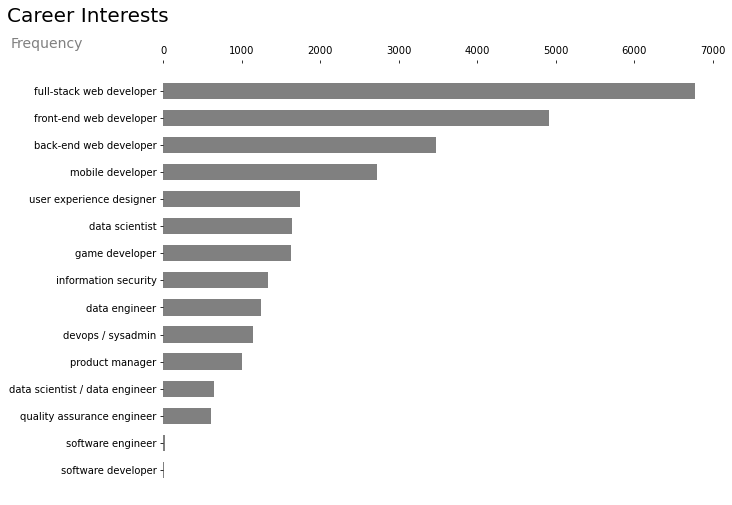

In [28]:
group_category = category_count.groupby("Interests").sum().sort_values(by = "Count", ascending= False).head(50)


fig, ax = plt.subplots(figsize = (10,8))
plt.barh(group_category.index[:15], group_category["Count"][:15], height = .6, color = "grey")
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.gca().invert_yaxis()
ax.xaxis.tick_top()
plt.title("Career Interests", size = 20, loc = "left", x = -0.28, y = 1.08)
plt.text(-1950, -1.6,"Frequency", size = 14, color = "grey")
plt.show()

After some data cleaning we can see that it's not perfect, but we definitely can tell that we have quite a range of interests ranging from primarily web-development to data science, game development and many other interests.

While we have many mixed interests, this is a good way to show that individuals might be interested in other topics than just web-development. We also see that some individuals responded with different versions of "I don't know" (for now we shall leave this in). While we already got a good understanding of job interests in previous code output, this is certainly a more granular approach.

Now that we have a better understanding of why people are learning new coding skills, we also need to find out where most respondents are from. In order to advertise in the right markets we have to know where our potential customers are located. We can use the `CountryLive` column to find this information.

### Age and Gender

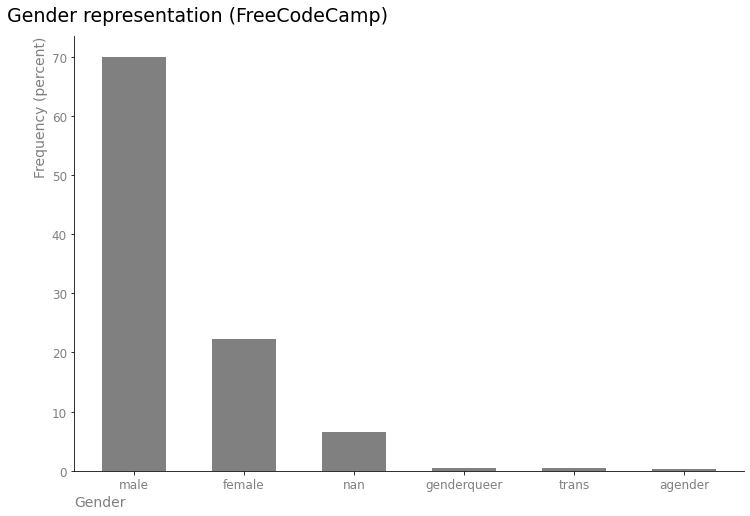

In [29]:

genders = survey["Gender"].value_counts(normalize=True, dropna=False) * 100
fig, ax = plt.subplots(figsize = (12, 8))
genders.plot(kind = "bar", color = "grey", width = .58)
plt.title("Gender representation (FreeCodeCamp)", size = 19, loc = "left", x = -0.1, y = 1.02)
plt.xticks(rotation = 0, size = 12)
plt.gca().spines[["right","top"]].set_visible(False)
plt.ylabel("Frequency (percent)", color = "grey", size = 14, loc = "top")
plt.xlabel("Gender", color = "grey", size = 14, loc = "left")
plt.yticks(size = 12, color = "grey")
plt.xticks(size = 12, color = "grey")
plt.show()

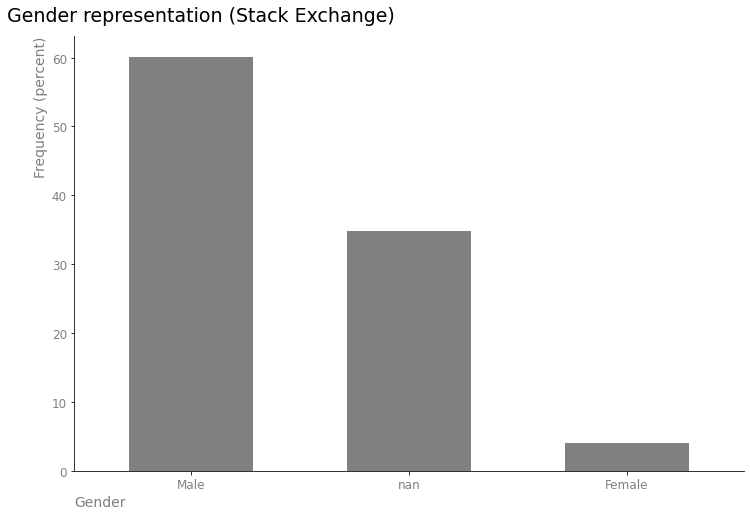

In [30]:
genders_stk_exchange = exchange["Gender"].value_counts(normalize=True, dropna=False) * 100
fig, ax = plt.subplots(figsize = (12, 8))
genders_stk_exchange[:3].plot(kind = "bar", color = "grey", width = .57)
plt.title("Gender representation (Stack Exchange)", size = 19, loc = "left", x = -0.1, y = 1.02)
plt.xticks(rotation = 0, size = 12)
plt.gca().spines[["right","top"]].set_visible(False)
plt.ylabel("Frequency (percent)", color = "grey", size = 14, loc = "top")
plt.xlabel("Gender", color = "grey", size = 14, loc = "left")
plt.yticks(size = 12, color = "grey")
plt.xticks(size = 12, color = "grey")
plt.show()

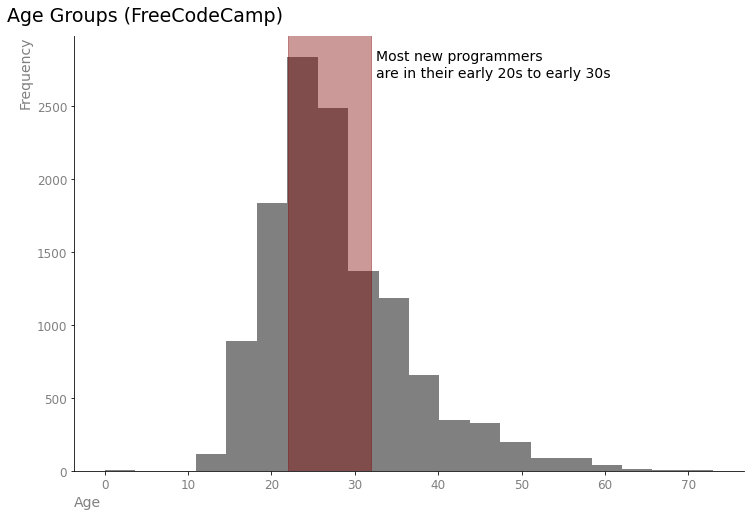

In [31]:
# Age distribution
fig, ax = plt.subplots(figsize = (12,8))
survey["Age"].hist(bins = 20, color = "grey")
plt.title("Age Groups (FreeCodeCamp)", size = 19, loc = "left", x = -0.1, y = 1.02)
ax.grid(False)
plt.xticks(size = 12)
plt.gca().spines[["right","top"]].set_visible(False)
plt.ylabel("Frequency", color = "grey", size = 14, loc = "top")
plt.xlabel("Age", color = "grey", size = 14, loc = "left")
plt.yticks(size = 12, color = "grey")
plt.xticks(size = 12, color = "grey")
plt.text(32.5,2700,"Most new programmers\nare in their early 20s to early 30s", size = 14)
plt.axvspan(survey["Age"].quantile(0.25), survey["Age"].quantile(0.75), ymax=1000, color = "maroon", alpha = 0.4)
plt.show()

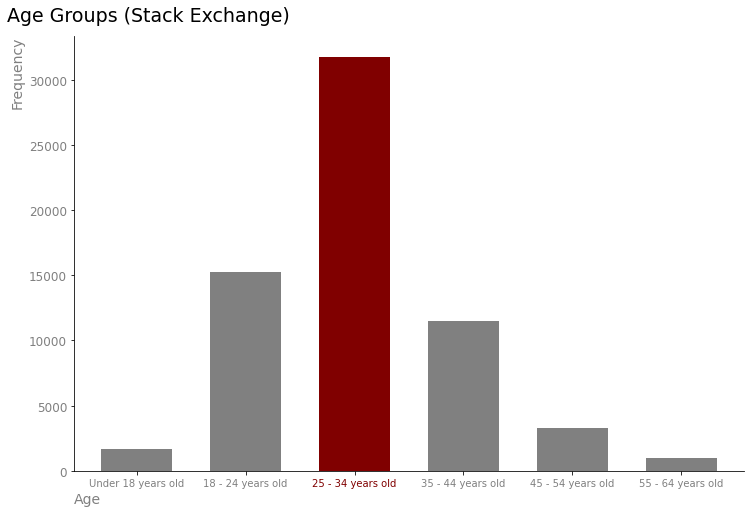

In [32]:
# Stack exchange age groups

colors = ["grey","grey", "maroon", "grey", "grey", "grey"]
fig, ax = plt.subplots(figsize = (12, 8))
ages = exchange["Age"].value_counts().iloc[[4,1,0,2,3,5]].plot.bar(width = 0.65, color = colors)
plt.xticks(rotation = 0, size = 12)
plt.gca().spines[["right","top"]].set_visible(False)
plt.title("Age Groups (Stack Exchange)", size = 19, loc = "left",x = -0.1, y = 1.02)
plt.ylabel("Frequency", color = "grey", size = 14, loc = "top")
plt.xlabel("Age", color = "grey", size = 14, loc = "left")
plt.yticks(size = 12, color = "grey")
plt.xticks(size = 10, color = "grey")
plt.gca().get_xticklabels()[2].set_color("maroon")
plt.show()

### Country Representation

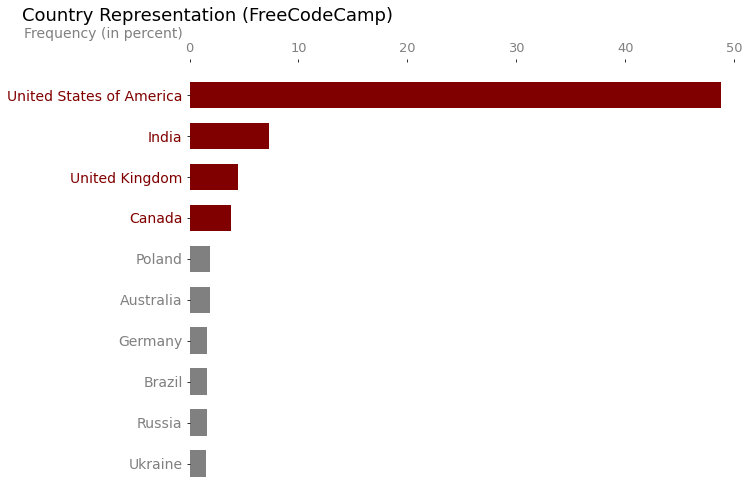

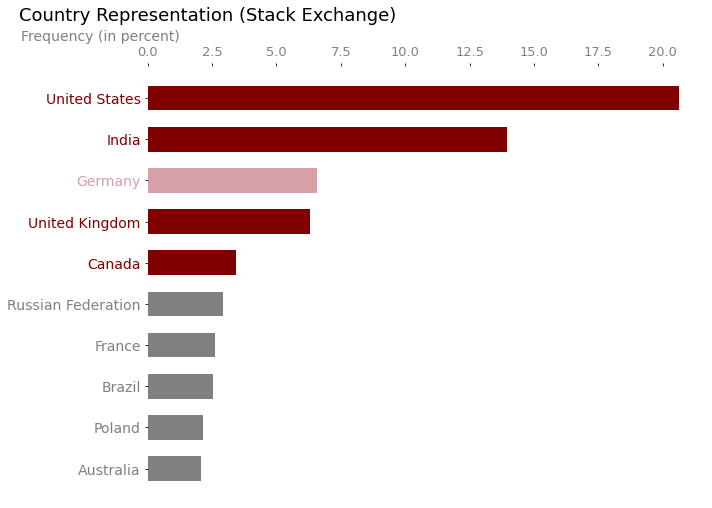

In [33]:
countries = survey["CountryLive"].value_counts(normalize=True) * 100
countries = pd.Series.to_frame(countries).reset_index()
countries = countries.rename(columns={"index":"Country","CountryLive":"Percentage"})
countries

countries_stack = exchange["Country"].value_counts(normalize=True) * 100
countries_stack = pd.Series.to_frame(countries_stack).reset_index()
#job_benefits.index.name = 'Benefits'
#job_benefits.reset_index()
countries_stack = countries_stack.rename(columns={"index":"Country","Country":"Percentage"})
countries_stack

# FreeCodeCamp
fig, ax = plt.subplots(figsize = (10, 8))

colors = ["maroon","maroon","maroon","maroon","grey","grey","grey","grey","grey","grey"]
plt.barh(countries["Country"][:10], countries["Percentage"][:10], color = colors, height= 0.65)
plt.title("Country Representation (FreeCodeCamp)", loc = "left", size = 18, x = -0.3, y = 1.08)
plt.gca().invert_yaxis()
ax.xaxis.tick_top()
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.text(-15.2, -1.4,"Frequency (in percent)", size = 14, color = "grey")
plt.xticks(size = 13, color = "grey")
plt.yticks(size = 14, color = "grey")

plt.gca().get_yticklabels()[0].set_color("maroon")
plt.gca().get_yticklabels()[1].set_color("maroon")
plt.gca().get_yticklabels()[2].set_color("maroon")
plt.gca().get_yticklabels()[3].set_color("maroon")
plt.show()



# Stack Exchange
fig, ax = plt.subplots(figsize = (10, 8))

colors = ["maroon","maroon","#D6A0A9","maroon","maroon","grey","grey","grey","grey","grey"]
plt.barh(countries_stack["Country"][:10], countries_stack["Percentage"][:10], color = colors, height= 0.6)
plt.title("Country Representation (Stack Exchange)", loc = "left", size = 18, x = -0.23, y = 1.09)
plt.gca().invert_yaxis()
ax.xaxis.tick_top()
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.text(-4.9, -1.4,"Frequency (in percent)", size = 14, color = "grey")
plt.xticks(size = 13, color = "grey")
plt.yticks(size = 14, color = "grey")

plt.gca().get_yticklabels()[0].set_color("maroon")
plt.gca().get_yticklabels()[1].set_color("maroon")
plt.gca().get_yticklabels()[2].set_color("#D6A0A9")
plt.gca().get_yticklabels()[3].set_color("maroon")
plt.gca().get_yticklabels()[4].set_color("maroon")
plt.show()

Country representation between both surveys is about the same. A majority of survey participants are from the United States, followed by India in both examples. Countries with the highest participation are English-Speaking countries (except for Germany in Stack Exchange).

Both datasets share similar a similar distribution concerning age.

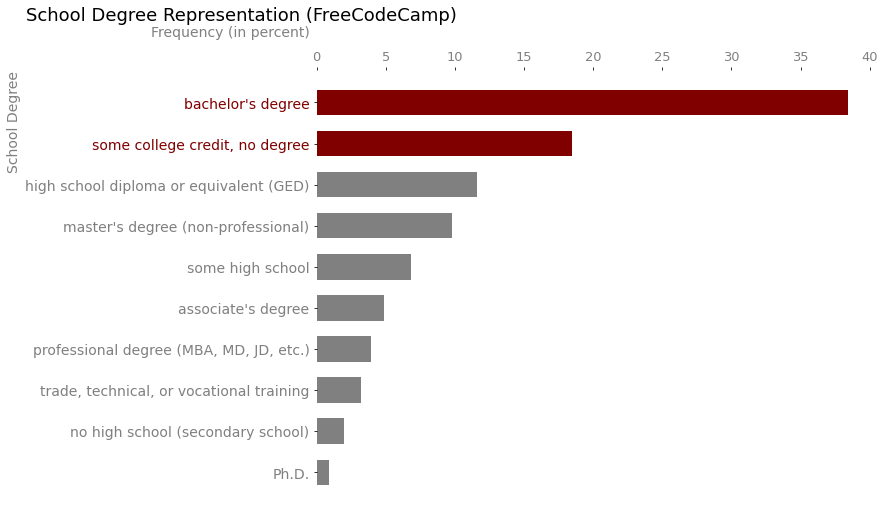

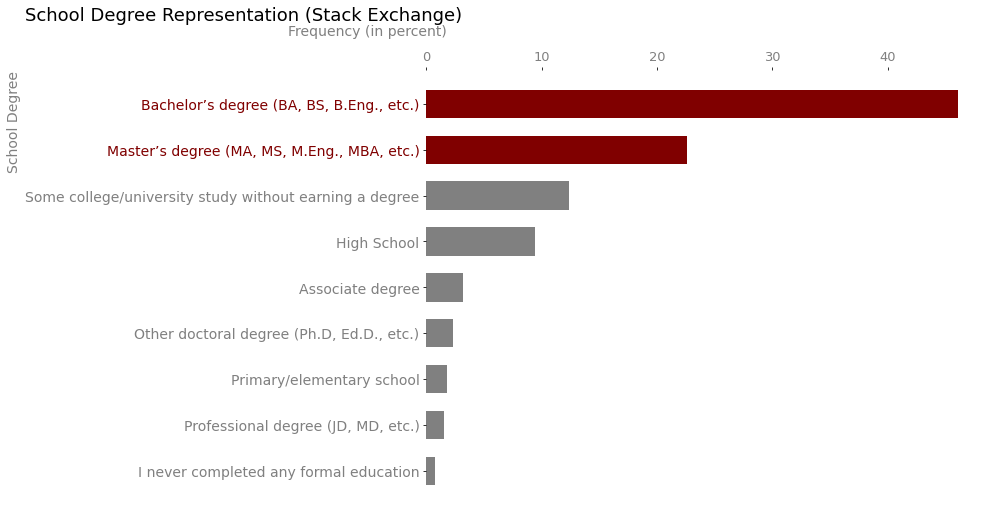

In [34]:
# Free code camp
code_camp_edu = survey["SchoolDegree"].value_counts(normalize=True) * 100
code_camp_edu = pd.Series.to_frame(code_camp_edu).reset_index()
code_camp_edu = code_camp_edu.rename(columns={"index":"School Degree","SchoolDegree":"Percentage"})
code_camp_edu

fig, ax = plt.subplots(figsize = (10, 8))

colors = ["maroon","maroon","grey","grey","grey","grey","grey","grey","grey","grey"]
plt.barh(code_camp_edu["School Degree"][:10], code_camp_edu["Percentage"][:10], color = colors, height= 0.62)
plt.title("School Degree Representation (FreeCodeCamp)", loc = "left", size = 18, x = -0.52, y = 1.1)
plt.ylabel("School Degree", loc = "top", size = 14, color = "grey")
plt.gca().invert_yaxis()
ax.xaxis.tick_top()
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.text(-12, -1.6,"Frequency (in percent)", size = 14, color = "grey")
plt.xticks(size = 13, color = "grey")
plt.yticks(size = 14, color = "grey")

plt.gca().get_yticklabels()[0].set_color("maroon")
plt.gca().get_yticklabels()[1].set_color("maroon")

plt.show()


# Stack Exchange
exchange["FormalEducation"] = exchange["FormalEducation"].replace({"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)":"High School"})

stk_exchange_edu = exchange["FormalEducation"].value_counts(normalize=True) * 100
stk_exchange_edu = pd.Series.to_frame(stk_exchange_edu).reset_index()
stk_exchange_edu = stk_exchange_edu.rename(columns={"index":"School Degree","FormalEducation":"Percentage"})
stk_exchange_edu


fig, ax = plt.subplots(figsize = (10, 8))

colors = ["maroon","maroon","grey","grey","grey","grey","grey","grey","grey","grey"]
plt.barh(stk_exchange_edu["School Degree"], stk_exchange_edu["Percentage"], color = colors, height= 0.62)
plt.title("School Degree Representation (Stack Exchange)", loc = "left", size = 18, x = -0.72, y = 1.1)
plt.ylabel("School Degree", loc = "top", size = 14, color = "grey")
plt.gca().invert_yaxis()
ax.xaxis.tick_top()
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.text(-12, -1.5,"Frequency (in percent)", size = 14, color = "grey")
plt.xticks(size = 13, color = "grey")
plt.yticks(size = 14, color = "grey")

plt.gca().get_yticklabels()[0].set_color("maroon")
plt.gca().get_yticklabels()[1].set_color("maroon")
plt.show()

### Job Benefits and Satisfaction

Participants were asked the following questions regarding employment opportunities:
- "Imagine that you are assessing a potential job opportunity. Please rank the following aspects of the job opportunity in order of importance , where 1 is the most important and 10 is the least important.
- "Now, imagine you are assessing a job's benefits package. Please rank the following aspects of a job's benefits package from most to least important to you, where 1 is most important and 11 is least important.

By calculating the job aspects and benefits, on average the most important values should have a lower score (since 1 is most important, and 10 is least important).

In [35]:
# Rename current job related columns from stack exchange dataset
# Currency related columns
currency = exchange.columns[51:56].tolist()

# Columns up to index 38
columns = exchange.columns[:38].tolist()

# Age and gender columns
columns.extend(["Gender", "Age"])

# Add currency related columns to list
for i in currency:
    columns.append(i)

# Isolates dataframe down to columns from list "columns"
stk_exchange = exchange[columns].copy()

# Rename job aspects and job benefits columns for easier comprehension
rename_cols = {
                "AssessJob1":"Industry_working_in",
                "AssessJob2":"Company_funding",
                "AssessJob3":"Department_working_in",
                "AssessJob4":"Technologies/Frameworks",
                "AssessJob5":"Compensation_and_benefits",
                "AssessJob6":"Company_culture",
                "AssessJob7":"WFH",
                "AssessJob8":"Professional_development",
                "AssessJob9":"Company_diversity",
                "AssessJob10":"Product_impact",
                "AssessBenefits1":"Compensation",
                "AssessBenefits2":"Stock_options",
                "AssessBenefits3":"Health_insurance",
                "AssessBenefits4":"Parental_leave",
                "AssessBenefits5":"Fitness_wellness_benefit",
                "AssessBenefits6":"Retirement",
                "AssessBenefits7":"Meals/snacks",
                "AssessBenefits8":"Computer/office_equipment",
                "AssessBenefits9":"Childcare_benefit",
                "AssessBenefits10":"Transportaion_benefit",
                "AssessBenefits11":"Conference/education_budget"
                }

exchange = exchange.rename(columns=rename_cols)

# Isolate rows only containing following countries listed below
stk_countries = stk_exchange[stk_exchange["Country"].str.contains("United States|India|United Kingdom|Canada", na = False)]
len(stk_countries["Country"])

43644

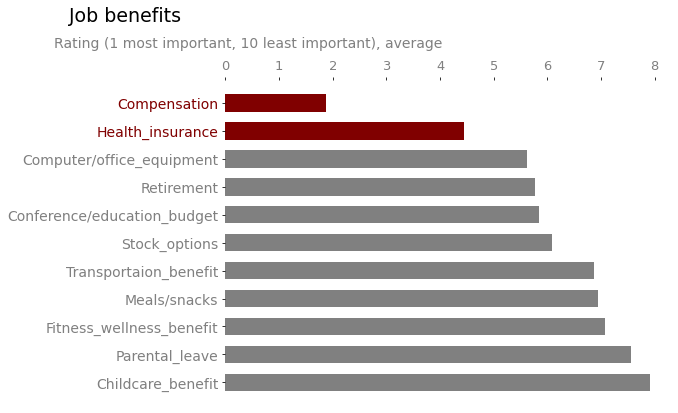

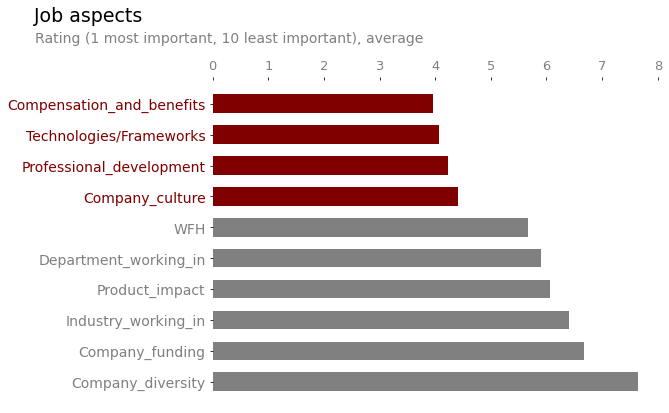

In [36]:
# Constructs dataframe object from job aspects
job_assessment = exchange.iloc[:,17:27]
assessments = pd.Series.to_frame(job_assessment.mean(axis=0).sort_values(ascending=False))
assessments.index.name = 'Aspects'
assessments.reset_index()

# Constructs dataframe object from job benefits
benefits = exchange.iloc[:,27:38]
benefits.mean(axis=0).sort_values(ascending=False)
job_benefits = pd.Series.to_frame(benefits.mean(axis=0).sort_values(ascending=False))
job_benefits.index.name = 'Benefits'
job_benefits.reset_index()

# If looking for a new job, rate importance of job aspects from 1(most important) to 10(least important)
colors = ["grey","grey","grey","grey","grey","grey","grey","grey","grey","maroon","maroon"]

fig, ax = plt.subplots(figsize = (8, 6))
plt.barh(job_benefits.index, job_benefits[0], color = colors, height= 0.62)
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
ax.xaxis.tick_top()
plt.title("Job benefits", size = 19, loc = "left", x= -0.35, y = 1.16)
plt.text(-3.2,12,"Rating (1 most important, 10 least important), average", color = "grey", size = 14)
plt.yticks(size = 14, color = "grey")
plt.xticks(size = 13, color = "grey")
plt.gca().get_yticklabels()[-1].set_color("maroon")
plt.gca().get_yticklabels()[-2].set_color("maroon")
plt.show()

# If looking for a new job, rate importance of job benefits from 1(most important) to 11(least important)
colors = ["grey","grey","grey","grey","grey","grey","maroon","maroon","maroon","maroon"]

fig, ax = plt.subplots(figsize = (8, 6))
plt.barh(assessments.index, assessments[0], color = colors, height= 0.6)
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
ax.xaxis.tick_top()
#ax.yaxis.label[0].set_color('silver')
plt.title("Job aspects", size = 19, loc = "left", x= -0.4, y = 1.16)
plt.text(-3.2,11,"Rating (1 most important, 10 least important), average", color = "grey", size = 14)
plt.yticks(size = 14, color = "grey")
plt.xticks(size = 13, color = "grey")

plt.gca().get_yticklabels()[-1].set_color("maroon")
plt.gca().get_yticklabels()[-2].set_color("maroon")
plt.gca().get_yticklabels()[-3].set_color("maroon")
plt.gca().get_yticklabels()[-4].set_color("maroon")
plt.show()


### Income/Financial Situations
`Income`: Respondents were asked their current yearly income.

`ExpectedEarning`: "About how much money do you expect to earn per year at your first developer job, in US dollars?"

`Has Debt`: The question asked was "Do you have any debt?"




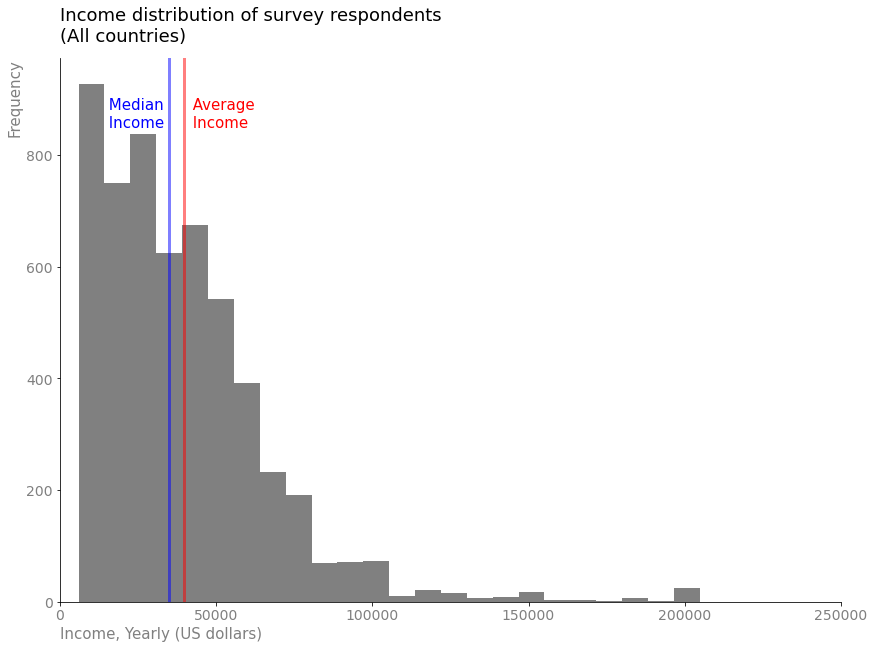

In [37]:
# Income distribution
fig, ax = plt.subplots(figsize = (14,10))
survey["Income"].plot.hist(bins = 120, color = "grey", xlim = (0,250000))
plt.gca().spines[["right","top"]].set_visible(False)
plt.title("Income distribution of survey respondents\n(All countries)",loc= "left", size = 18, y = 1.02)
plt.axvline(survey["Income"].mean(), color = "red", alpha = 0.5, linewidth = 3)
plt.axvline(survey["Income"].median(), color = "blue", alpha = 0.5, linewidth = 3)
plt.text(41000, 850, " Average \n Income", size = 15, color = "red")
plt.text(14000, 850, " Median \n Income", size = 15, color = "blue")
plt.ylabel("Frequency",size = 15, loc = "top", color ="grey")
plt.yticks(size = 14, color = "grey")
plt.xticks(size = 14, color = "grey")
plt.xlabel("Income, Yearly (US dollars)", size = 15, loc = "left", color ="grey")
plt.show()

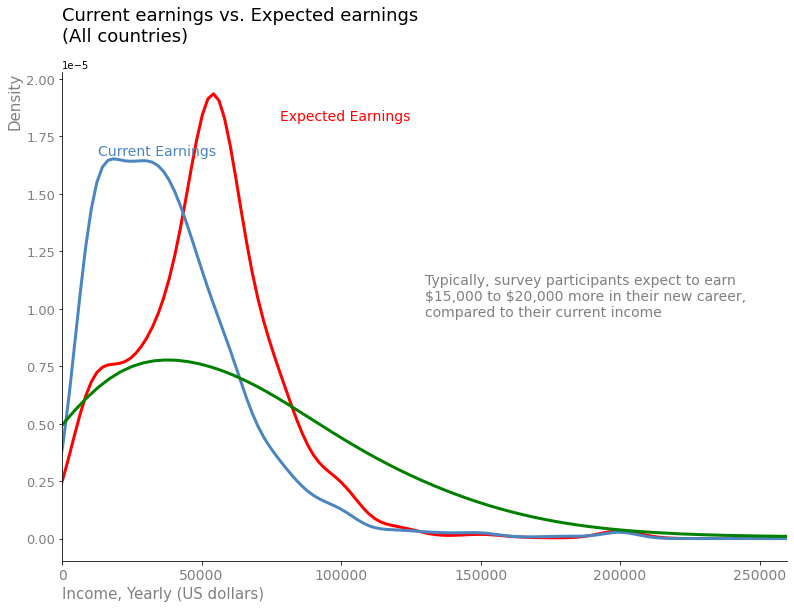

In [59]:
# Difference between current income and expected income
fig, ax = plt.subplots(figsize = (13,9))
survey["ExpectedEarning"].plot.kde(xlim = (0, 200000), color = "red", linewidth = 3)
survey["Income"].plot.kde(color = "#4B86C1", linewidth = 3)
plt.title("Current earnings vs. Expected earnings\n(All countries)", size = 18, loc = "left", y = 1.05)

plt.xticks(size = 14)
plt.yticks(size = 14)
plt.ylabel("Density", size = 15, color = "grey", loc = "top")
plt.xlabel("Income, Yearly (US dollars)", size = 15, color = "grey", loc = "left")
plt.gca().spines[["right", "top"]].set_visible(False)
plt.text(x = 0.05, y = 0.83, s="Current Earnings", color = "#4B86C1", size = 14, transform=ax.transAxes)
plt.text(x = 0.3, y = .90, s="Expected Earnings", color = "red", size = 14, transform=ax.transAxes)

plt.text(0.5,0.5,"""Typically, survey participants expect to earn\n\$15,000 to \$20,000 more in their new career,
compared to their current income""", color = "grey", size = 14, transform=ax.transAxes)

plt.yticks(size = 13, color = "grey")
plt.xticks(size = 14, color = "grey")

#stem["basesalary"].plot.kde(color = "orange", linewidth = 3)

#stk_exchange["ConvertedSalary"].plot.kde(xlim = (stk_exchange["ConvertedSalary"].min(), 260000), color = "green", linewidth = 3)

plt.show()



In [55]:
united_states = survey[survey["CountryLive"] == "United States of America"]
stem = salaries[salaries["basesalary"] <= 260000].copy()

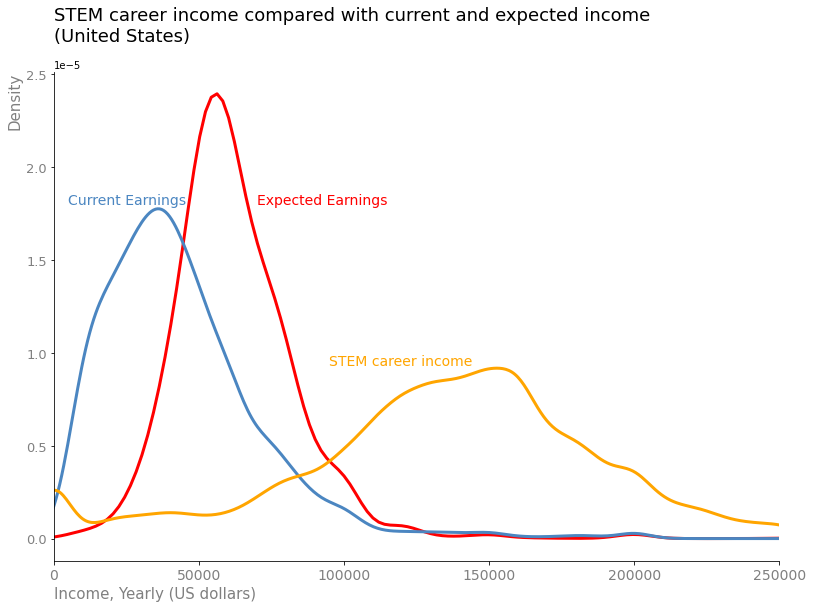

In [56]:
fig, ax = plt.subplots(figsize = (13,9))
united_states["ExpectedEarning"].plot.kde(xlim = (0, 250000), color = "red", linewidth = 3)
united_states["Income"].plot.kde(color = "#4B86C1", linewidth = 3)
stem["basesalary"].plot.kde(color = "orange", linewidth = 3)

plt.title("STEM career income compared with current and expected income\n(United States)", size = 18, loc = "left", y = 1.05)

plt.xticks(size = 14)
plt.yticks(size = 14)

plt.text(0.02,0.73,"Current Earnings", color = "#4B86C1", size = 14, transform=ax.transAxes)
plt.text(0.28,0.73,"Expected Earnings", color = "red", size = 14, transform=ax.transAxes)
plt.text(0.38,0.4,"STEM career income", color = "orange", size = 14, transform=ax.transAxes)

plt.ylabel("Density", size = 15, color = "grey", loc = "top")
plt.xlabel("Income, Yearly (US dollars)", size = 15, color = "grey", loc = "left")
plt.gca().spines[["right", "top"]].set_visible(False)
plt.yticks(size = 13, color = "grey")
plt.xticks(size = 14, color = "grey")
plt.show()

In [ ]:
survey["ExpectedEarning"].describe()

count      13495.000000
mean       54435.435889
std        50448.278375
min         6000.000000
25%        35000.000000
50%        54435.435889
75%        65000.000000
max      1000000.000000
Name: ExpectedEarning, dtype: float64

There is certainly a difference between what the average current salary is from the expected salary of the data. We know that many participants indicated careers that utilize programming skills. Higher income and a new career may likely explain the interest in programming.

We can find each person's desired salary increase (in percent) by utilizing the following formula

*Increase = New Number - Original Number*

*% increase = Increase / Original Number x 100*

Since we have missing data points in both columns we expect to see negative percentages in the new column that we create. Missing data won't be dropped, instead we'll ignore any percentages below 0.

In [ ]:
# Column creation using formula above
survey["Percent_Increase"] = (survey["ExpectedEarning"] - survey["Income"]) / survey["Income"] * 100
survey["Percent_Increase"].value_counts(bins = 20, normalize= True) * 100

(-115.647, 734.302]       40.118562
(734.302, 1567.585]        0.644683
(1567.585, 2400.867]       0.044461
(15733.384, 16566.667]     0.014820
(4067.432, 4900.714]       0.007410
(5733.996, 6567.279]       0.007410
(2400.867, 3234.149]       0.007410
(14066.82, 14900.102]      0.007410
(3234.149, 4067.432]       0.000000
(4900.714, 5733.996]       0.000000
(6567.279, 7400.561]       0.000000
(7400.561, 8233.843]       0.000000
(9067.126, 9900.408]       0.000000
(9900.408, 10733.69]       0.000000
(10733.69, 11566.973]      0.000000
(11566.973, 12400.255]     0.000000
(12400.255, 13233.537]     0.000000
(13233.537, 14066.82]      0.000000
(14900.102, 15733.384]     0.000000
(8233.843, 9067.126]       0.000000
Name: Percent_Increase, dtype: float64

In [ ]:
survey["Percent_Increase"].describe()


count     5513.000000
mean       114.854877
std        426.808356
min        -98.980000
25%          5.263158
50%         45.756251
75%        122.857143
max      16566.666667
Name: Percent_Increase, dtype: float64

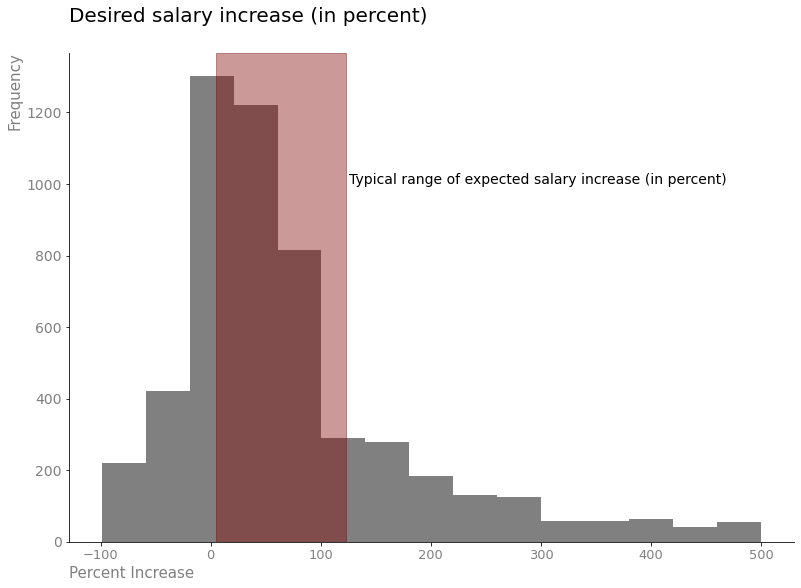

In [ ]:
fig, ax = plt.subplots(figsize = (13,9))


# Expected salary increase (in a percentage) histogram
survey[survey["Percent_Increase"] <= 500]["Percent_Increase"].plot.hist(bins = 15, color = "grey")
# Boolean masking ^^^ less than or equal to %500 ^^^

# Lower and upper quartile %25 to %75 range
plt.axvspan(survey["Percent_Increase"].quantile(0.25), survey["Percent_Increase"].quantile(0.75), color = "maroon", alpha = 0.4)

plt.gca().spines[["right","top"]].set_visible(False)
plt.title("Desired salary increase (in percent)", loc="left", size = 20, y = 1.05)
plt.ylabel("Frequency", size = 15, color = "grey", loc = "top")
plt.xlabel("Percent Increase", size = 15, loc = "left", color = "grey")
plt.xticks(size = 13, color = "grey")
plt.yticks(size = 14, color = "grey")
plt.text(126,1000,"Typical range of expected salary increase (in percent)", size = 14)
plt.show()

In [ ]:
# Replaces following columns with True/False values
survey["HasDebt"] = survey["HasDebt"].replace({1.0:"True", 0.0: "False"})
survey["HasFinancialDependents"] = survey["HasFinancialDependents"].replace({1.0:"True", 0.0: "False"})

In [ ]:
# Financial dependents
print("Financial Dependents:","\n", survey["HasFinancialDependents"].value_counts(normalize = True, dropna=False) * 100) 
print("\n")

# Has debt of any kind
print("Has Debt:", "\n", survey["HasDebt"].value_counts(normalize = True, dropna=False) * 100) 
print("\n")

Financial Dependents: 
 False    71.619118
True     21.074472
NaN       7.306410
Name: HasFinancialDependents, dtype: float64


Has Debt: 
 False    50.596517
True     41.948870
NaN       7.454613
Name: HasDebt, dtype: float64




### Employment

In [ ]:
survey["HoursLearning"] = survey["HoursLearning"].fillna(survey["HoursLearning"].median())

In [ ]:
survey["EmploymentStatus"].value_counts(dropna=False)

Employed for wages                      5564
Not working but looking for work        3395
NaN                                     1899
Not working and not looking for work     948
Self-employed freelancer                 644
Doing an unpaid internship               294
Unable to work                           235
A stay-at-home parent or homemaker       220
Self-employed business owner             210
Military                                  62
Retired                                   24
Name: EmploymentStatus, dtype: int64

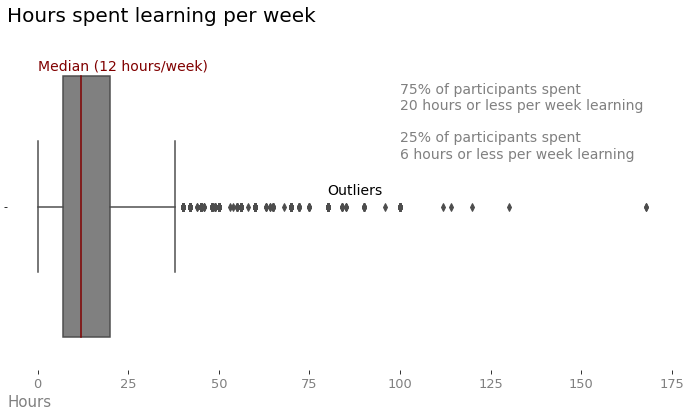

count    13495.000000
mean        16.955761
std         14.573179
min          0.000000
25%          7.000000
50%         12.000000
75%         20.000000
max        168.000000
Name: HoursLearning, dtype: float64


In [ ]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.boxplot(x= "HoursLearning", data = survey, color = "grey", medianprops=dict(color="maroon", alpha=1))
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.text(80,-0.04,"Outliers", size = 14)
plt.title("Hours spent learning per week", loc="left", size = 20, y = 1.05)
plt.text(0, -0.42, "Median (12 hours/week)", size = 14, color = "maroon")
plt.text(100, -0.3, "75% of participants spent\n20 hours or less per week learning", size = 14, color = "grey")
plt.text(100, -0.15, "25% of participants spent\n6 hours or less per week learning", size = 14, color = "grey")
plt.xlabel("Hours", size = 15, loc = "left", color = "grey")
plt.xticks(size = 13, color = "grey")
plt.show()
print(survey["HoursLearning"].describe())

In [ ]:
# Hours spent per week by employment status
survey.groupby("EmploymentStatus")["HoursLearning"].median().sort_values(ascending=False)

EmploymentStatus
Not working but looking for work        20.0
Self-employed freelancer                20.0
Doing an unpaid internship              15.0
Self-employed business owner            15.0
Not working and not looking for work    14.0
A stay-at-home parent or homemaker      13.0
Retired                                 12.0
Unable to work                          12.0
Employed for wages                      10.0
Military                                10.0
Name: HoursLearning, dtype: float64

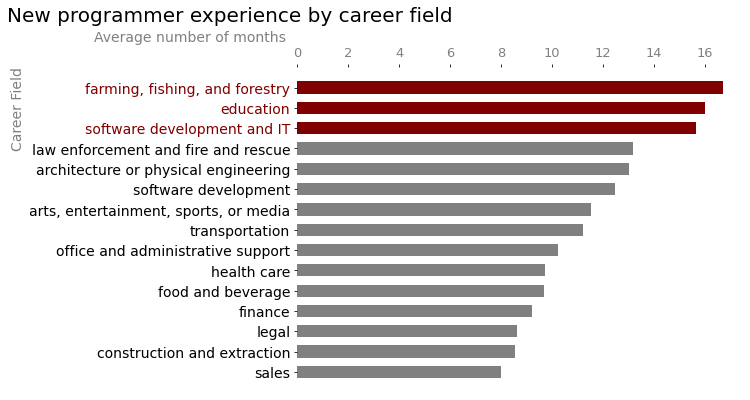

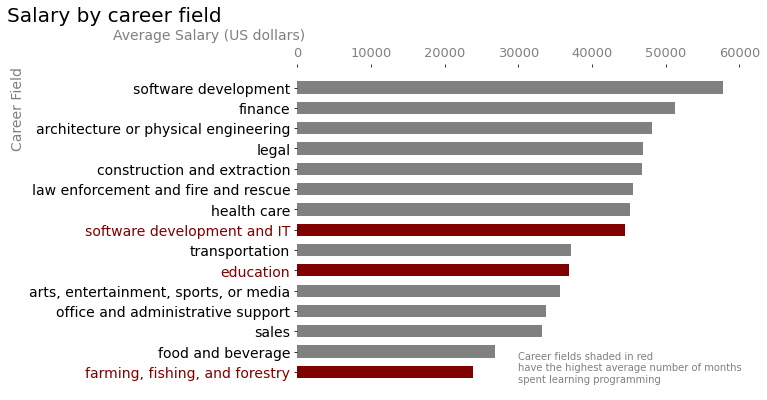

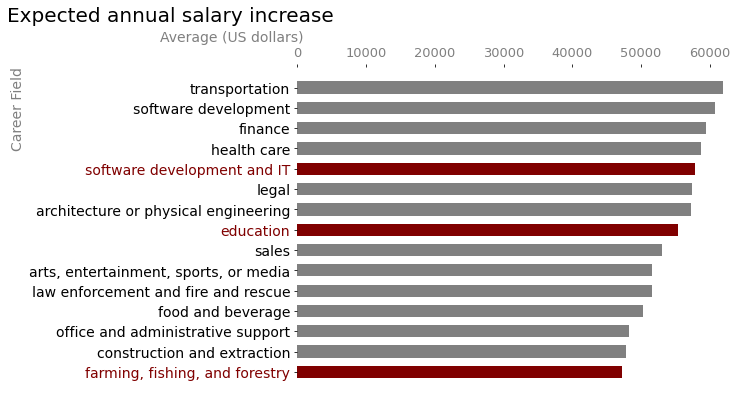

In [ ]:
# Salary and experience comparison for employment fields

# Assign groupby objects for plotting using SchoolDegree 
empfld_months_prg = survey.groupby("EmploymentField").mean().sort_values(by="MonthsProgramming") # sort by the average number of months programming
empfld_income = survey.groupby("EmploymentField").mean().sort_values(by="Income") # sort by the average income
empfld_expected_salary = survey.groupby("EmploymentField").mean().sort_values(by="ExpectedEarning")

# Experience
colors = ["grey", "grey", "grey", "grey", "grey","grey", "grey", "grey", "grey", "grey","grey", "grey", "maroon", "maroon", "maroon",]

fig, ax = plt.subplots(figsize = (8, 6))
plt.barh(empfld_months_prg.index, empfld_months_prg["MonthsProgramming"], color = colors, height = 0.6)
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.ylabel("Career Field", loc = "top", size = 14, color = "grey")
plt.text(-8,16.3,"Average number of months", size = 14, color = "grey")
plt.title("New programmer experience by career field", size = 20, loc = "left", x = -0.65, y = 1.12)
ax.xaxis.tick_top()
plt.xticks(size = 13, color = "grey")
plt.yticks(size = 14)

plt.gca().get_yticklabels()[-1].set_color("maroon")
plt.gca().get_yticklabels()[-2].set_color("maroon")
plt.gca().get_yticklabels()[-3].set_color("maroon")

plt.show()

# Salary
colors = ["maroon", "grey", "grey", "grey", "grey","maroon", "grey", "maroon", "grey", "grey","grey", "grey", "grey", "grey", "grey",]

fig, ax = plt.subplots(figsize = (8, 6))
plt.barh(empfld_income.index, empfld_income["Income"], color = colors, height = 0.6)
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.ylabel("Career Field", loc = "top", size = 14, color = "grey")
plt.text(-25000,16.4,"Average Salary (US dollars)", size = 14, color = "grey")
plt.title("Salary by career field", size = 20, loc = "left", x = -0.65, y = 1.12)
ax.xaxis.tick_top()
plt.xticks(size = 13, color = "grey")
plt.yticks(size = 14)

plt.gca().get_yticklabels()[0].set_color("maroon")
plt.gca().get_yticklabels()[5].set_color("maroon")
plt.gca().get_yticklabels()[-8].set_color("maroon")
plt.text(30000,-0.5, "Career fields shaded in red\nhave the highest average number of months\nspent learning programming", color = "grey")
plt.show()

colors_salary = ["maroon", "grey", "grey", "grey", "grey","grey", "grey", "maroon", "grey", "grey","maroon", "grey", "grey", "grey", "grey",]

fig, ax = plt.subplots(figsize = (8, 6))
plt.barh(empfld_expected_salary.index, empfld_expected_salary["ExpectedEarning"].sort_values(), color = colors_salary, height = 0.6)
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.ylabel("Career Field", loc = "top", size = 14, color = "grey")
plt.text(-20000, 16.3,"Average (US dollars)", size = 14, color = "grey")
plt.title("Expected annual salary increase", size = 20, loc = "left", x = -0.65, y = 1.12)
ax.xaxis.tick_top()
plt.xticks(size = 13, color = "grey")
plt.yticks(size = 14)

plt.gca().get_yticklabels()[0].set_color("maroon")
plt.gca().get_yticklabels()[-5].set_color("maroon")
plt.gca().get_yticklabels()[7].set_color("maroon")

plt.show()

The graphs above indicate a few points:
- People in lower paying jobs unrelated to programming reported that they have spent longer programming (probably outside of their current jobs)
- IT, archicture/physical engineering, and software development careers are the highest paid with the most programming experience (these individuals may be learning in their free time to boost their careers)

### Education

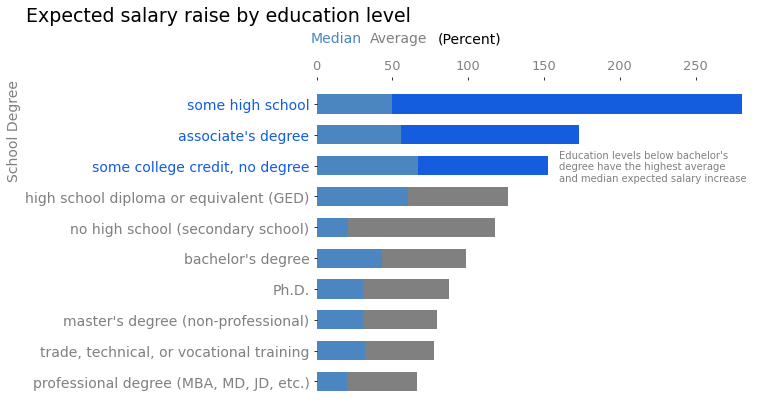

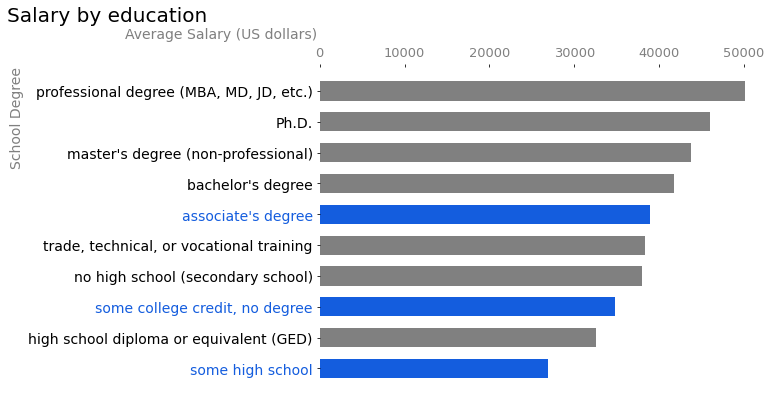

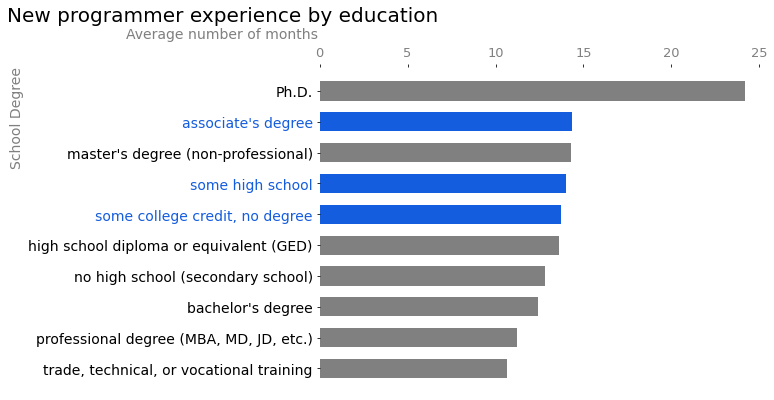

In [ ]:
# Median expeceted salary increase (percent)
salary_increase_median = round(survey.groupby("SchoolDegree")["Percent_Increase"].median().sort_values(ascending=False),2)
salary_increase_median = pd.Series.to_frame(salary_increase_median).reset_index()
salary_increase_median = salary_increase_median.rename(columns={"index":"SchoolDegree","Percent_Increase":"Percentage"})

# Average expected salary increase (percent)
salary_increase = round(survey.groupby("SchoolDegree")["Percent_Increase"].mean().sort_values(ascending=False),2)
salary_increase = pd.Series.to_frame(salary_increase).reset_index()
salary_increase = salary_increase.rename(columns={"index":"SchoolDegree","Percent_Increase":"Percentage"})
#------------------------------------------------------------------------------------------------------------------------#


colors = ["#145DDE", "#145DDE","#145DDE", "grey", "grey", "grey","grey", "grey", "grey", "grey"]

# Plot (1) results average and median salary increase (percent)
fig, ax = plt.subplots(figsize = (8, 6))
plt.title("Expected salary raise by education level", size = 19, loc = "left", x= -0.65, y = 1.16)
plt.ylabel("School Degree", loc = "top", size = 14, color = "grey")
# Misc. text
plt.text(-4,-2,"Median", color = "#4B86C1", size = 14)
plt.text(35,-2,"Average", color = "grey", size = 14)
plt.text(80,-2,"(Percent)", size = 14)
plt.text(160, 2.5,"Education levels below bachelor's\ndegree have the highest average\nand median expected salary increase", color = "grey")

# Average plotted
plt.barh(salary_increase["SchoolDegree"], salary_increase["Percentage"], color = colors, height = 0.62)
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
ax.xaxis.tick_top()

# Median plotted
plt.barh(salary_increase_median["SchoolDegree"], salary_increase_median["Percentage"], color = "#4B86C1", height = 0.62)
plt.yticks(size = 14, color = "grey")
plt.xticks(size = 13, color = "grey")
plt.gca().invert_yaxis()

plt.gca().get_yticklabels()[0].set_color("#145DDE")
plt.gca().get_yticklabels()[1].set_color("#145DDE")
plt.gca().get_yticklabels()[2].set_color("#145DDE")

plt.show()

#-----------------------------------------------------------------------------------------------------------------------------------------#

# Assign groupby objects for plotting using SchoolDegree 
schl_dgree = survey.groupby("SchoolDegree").mean().sort_values(by = "MonthsProgramming") # sort by the average number of months programming
degree_income = survey.groupby("SchoolDegree").mean().sort_values(by = "Income") # sort by the average income

# Plot results income by school edcuation level
colors_degree_income = ["#145DDE", "grey","#145DDE", "grey", "grey", "#145DDE","grey", "grey", "grey", "grey"]

# Plot (2) school degree income
fig, ax = plt.subplots(figsize = (8, 6))
plt.barh(degree_income.index, degree_income["Income"], color = colors_degree_income, height = 0.62)
plt.title("Salary by education", size = 20, loc = "left", x = -0.7, y = 1.12)
plt.text(-23000,10.7,"Average Salary (US dollars)", size = 14, color = "grey")
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.ylabel("School Degree", loc = "top", size = 14, color = "grey")
ax.xaxis.tick_top()
plt.xticks(size = 13, color = "grey")
plt.yticks(size = 14)

plt.gca().get_yticklabels()[0].set_color("#145DDE")
plt.gca().get_yticklabels()[2].set_color("#145DDE")
plt.gca().get_yticklabels()[5].set_color("#145DDE")

plt.show()


# Plot results number of months programming by edcuation level
colors_schl_dgree = ["grey", "grey","grey", "grey", "grey", "#145DDE","#145DDE", "grey", "#145DDE", "grey"]

# Plot (3) school degree number of months programming
fig, ax = plt.subplots(figsize = (8, 6))
plt.barh(schl_dgree.index, schl_dgree["MonthsProgramming"], color = colors_schl_dgree, height = 0.62)
plt.title("New programmer experience by education", size = 20, loc = "left", x = -0.7, y = 1.12)
plt.text(-11,10.7,"Average number of months", size = 14, color = "grey")
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.ylabel("School Degree", loc = "top", size = 14, color = "grey")
ax.xaxis.tick_top()
plt.xticks(size = 13, color = "grey")
plt.yticks(size = 14)

plt.gca().get_yticklabels()[-2].set_color("#145DDE")
plt.gca().get_yticklabels()[-4].set_color("#145DDE")
plt.gca().get_yticklabels()[-5].set_color("#145DDE")

plt.show()

Generally, when aggregating the data of salary expectations by education level, degree holders lower than Bachelor's expect a higher raise compared to 
current income levels. This may be due to a few factors:
1. The average yearly for individuals with less than a Bachelor's degree is less than higher level education, this may be skewed due to the fact that we know 75% of respondents indicated an expected salary of around \$65,000 per year. If income is less for certain education levels it would be normal to see a higher expected percentage increase, compared to higher earners that may expect less of a raise.
2. 

We also notice that these same education levels have more experience (greater number of months spent programming) as new programmers.

In [ ]:
# Calculate median to avoid most of the skewness from outliers
# Median hours spent studying programming
survey.groupby("SchoolDegree")["HoursLearning"].median().sort_values(ascending=False)

SchoolDegree
trade, technical, or vocational training    13.0
Ph.D.                                       12.0
associate's degree                          12.0
bachelor's degree                           12.0
high school diploma or equivalent (GED)     12.0
master's degree (non-professional)          12.0
professional degree (MBA, MD, JD, etc.)     12.0
some college credit, no degree              12.0
some high school                            12.0
no high school (secondary school)           10.0
Name: HoursLearning, dtype: float64

## Markets

A vast majority of respondents reside in the United States, followed by India at about 7 % and the United Kingdom at 5 %. Before making a decision, we need to find out how much are new programmers willing to spend on education. If we advertise in markets that are only interested in free learning we're unlikely to be profitable.

`MoneyForLearning` column describes the amount of money that survey participants have spent since the beginning of their programming journey. Since our business model operates on a monthly subscription we are interested in how much customers are willing to spend per month. To find that information we need to create a new column.

Formula: `MoneyForLearning` / `MonthsProgramming` 

We may need to limit our analysis to the following countries: US, India, UK, and Canada. Two reasons for this decision are:

* These countries have the highest frequency in the dataset
* The e-learning program is in English, and English is an official language in all these four countries. We'd like to maximize our chances of advertising to the right audience.


In [ ]:
survey["MonthsProgramming"].value_counts().head(20)

1.0     1373
6.0     1371
12.0    1334
3.0     1273
2.0     1228
24.0     821
4.0      733
5.0      557
36.0     441
0.0      421
8.0      412
10.0     320
18.0     288
7.0      246
9.0      229
20.0     194
48.0     190
30.0     149
60.0     143
15.0     143
Name: MonthsProgramming, dtype: int64

To avoid dividing by zero, we'll need to change that particular value with 1. We can at least assume that respondents that answered with 0 months experience had probably just started and had only a few weeks of experience. For simplicity we'll change it to 1.

In [ ]:
# Set new copy
spending = survey.copy()

# Replaces any instances of "zero months programming" (0) with (1) for proper calculation
spending["MonthsProgramming"] = spending["MonthsProgramming"].replace({0:1})

In [ ]:
# Calculates monthly spending by dividing money for learning with number of months programming
spending["Monthly_spending"] = spending["MoneyForLearning"] / spending["MonthsProgramming"]
spending["Monthly_spending"].value_counts(dropna=False)


0.000000        5769
NaN             1140
16.666667        297
50.000000        264
100.000000       246
                ... 
130.000000         1
80000.000000       1
76.000000          1
47.222222          1
1600.000000        1
Name: Monthly_spending, Length: 707, dtype: int64

In [ ]:
# Total number of missing data points in monthly_spending column
spending["Monthly_spending"].isna().sum()

1140

In [ ]:
# Drop missing data from following columns
spending = spending.dropna(subset=["CountryLive","Monthly_spending"])

# Groupby and calculate mean
avg_month = spending.groupby("CountryLive").mean()

# Shows only four countries selected below
avg_month["Monthly_spending"][["United States of America", "India","United Kingdom", "Canada"]]

CountryLive
United States of America    256.969675
India                       100.449884
United Kingdom               93.828988
Canada                      141.571630
Name: Monthly_spending, dtype: float64

* The United States spends the most out of the top four countries (at a significant amount compared to the other three)
* Surprisingly, UK spends the least eventhough the country's GDP per capita is higher than India's
* A box plot will show any discrepencies/outliers

In [ ]:
# Assigns new variable for countries listed below
four_countries = spending[spending["CountryLive"].str.contains("United States of America|India|United Kingdom|Canada")]

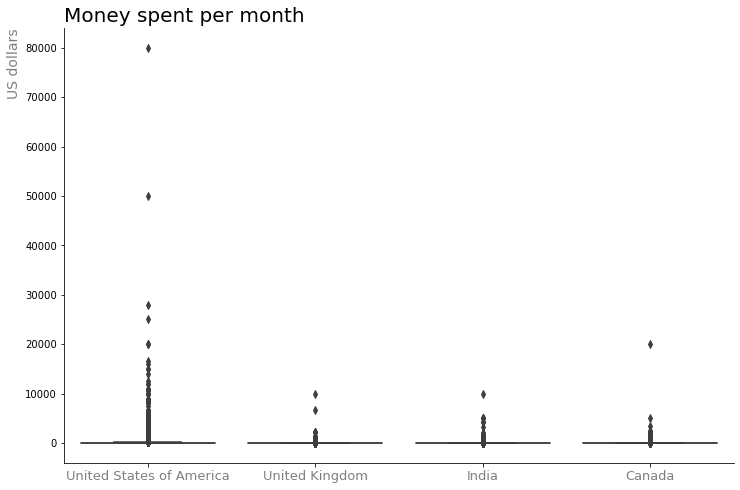

In [ ]:
# Plot results of outliers in USA, India, UK, and Canada
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = "CountryLive", y = "Monthly_spending", data = four_countries)
plt.gca().spines[["right","top"]].set_visible(False)
plt.xticks(size = 13, color = "grey")
plt.ylabel("US dollars", loc = "top", size = 14, color = "grey")
plt.xlabel("")
plt.title("Money spent per month", loc = "left", size = 20)
plt.show()

It's still difficult to tell if the data is wrong or not with so many outliers in each country. There are far too many data points with `monthly_spending` values that exceed thousands of dollars that skew average monthly spending.
Using the `.value_counts()` method with bins set to 20 should give a clearer picture of the distribution of `monthly_spending`. With this we should be able to know where to isolate the data further.

In [ ]:
# Value counts method shows distribution
spending["Monthly_spending"].value_counts(bins = 20, normalize= True) * 100

(-80.001, 4000.0]     99.210412
(4000.0, 8000.0]       0.442516
(8000.0, 12000.0]      0.182213
(16000.0, 20000.0]     0.052061
(12000.0, 16000.0]     0.043384
(24000.0, 28000.0]     0.017354
(36000.0, 40000.0]     0.008677
(68000.0, 72000.0]     0.008677
(48000.0, 52000.0]     0.008677
(76000.0, 80000.0]     0.008677
(32000.0, 36000.0]     0.008677
(28000.0, 32000.0]     0.008677
(44000.0, 48000.0]     0.000000
(52000.0, 56000.0]     0.000000
(56000.0, 60000.0]     0.000000
(60000.0, 64000.0]     0.000000
(64000.0, 68000.0]     0.000000
(20000.0, 24000.0]     0.000000
(72000.0, 76000.0]     0.000000
(40000.0, 44000.0]     0.000000
Name: Monthly_spending, dtype: float64

Even 4,000 USD per month is far higher than even the average college tuition in the United States, nonetheless, we'll use this amount as a cutoff for re-calculating the monthly spending of United States, India, UK, and Canada. This should result in slightly more accurate results that are not as heavily skewed by outliers.

In [ ]:
# Isolate rows to include only monthly spending less than or equal to $4000
#spending = spending[spending["Monthly_spending"] <= 4000]

# Monthly average spending by country
#avg_month = spending.groupby("CountryLive").mean()
#country_spends = avg_month["Monthly_spending"][["United States of America", "India","United Kingdom", "Canada"]].sort_index(ascending=False)
#country_spends

In [ ]:
# Money spent less than or equal to $4,000
four_countries = four_countries[four_countries["Monthly_spending"] <= 4000]

### Programming Bootcamp Attendance

In [ ]:
# Frequency of bootcamp attendance
# 0 = No
# 1 = Yes
four_countries["AttendedBootcamp"].value_counts(normalize= True, dropna= False) * 100

0.0    92.703173
1.0     6.868389
NaN     0.428438
Name: AttendedBootcamp, dtype: float64

In [ ]:
# Average money spent grouped by bootcamp attendance
four_countries.groupby("AttendedBootcamp")["MoneyForLearning"].mean()

AttendedBootcamp
0.0     494.725448
1.0    7546.541910
Name: MoneyForLearning, dtype: float64

In [ ]:
# Number of observations where individuals did not spend money
print("Free learning:", len(four_countries[four_countries["Monthly_spending"] <= 0]), "observations")

# Number of observations where individuals did not spend money
print("Paid learning", len(four_countries[four_countries["Monthly_spending"] > 0]), "observations")

Free learning: 3271 observations
Paid learning 4198 observations


In [ ]:
# Frequency of observations that did not spend money, but did attend a programming bootcamp
# Boolean masking
free = (four_countries[four_countries["Monthly_spending"] == 0])
free["AttendedBootcamp"].value_counts(dropna=False, normalize= True) * 100

0.0    98.135127
1.0     1.284011
NaN     0.580862
Name: AttendedBootcamp, dtype: float64

In [ ]:

attended_bc = four_countries[four_countries["Monthly_spending"] > 0]
attended_bc["AttendedBootcamp"].value_counts(dropna=False, normalize= True) * 100

0.0    88.470700
1.0    11.219628
NaN     0.309671
Name: AttendedBootcamp, dtype: float64

In [ ]:
group_a = (four_countries["Monthly_spending"] > 0) & (four_countries["AttendedBootcamp"] == 1)
a = four_countries[group_a]

group_b = (four_countries["Monthly_spending"] > 0) & (four_countries["AttendedBootcamp"] == 0)
b = four_countries[group_b]

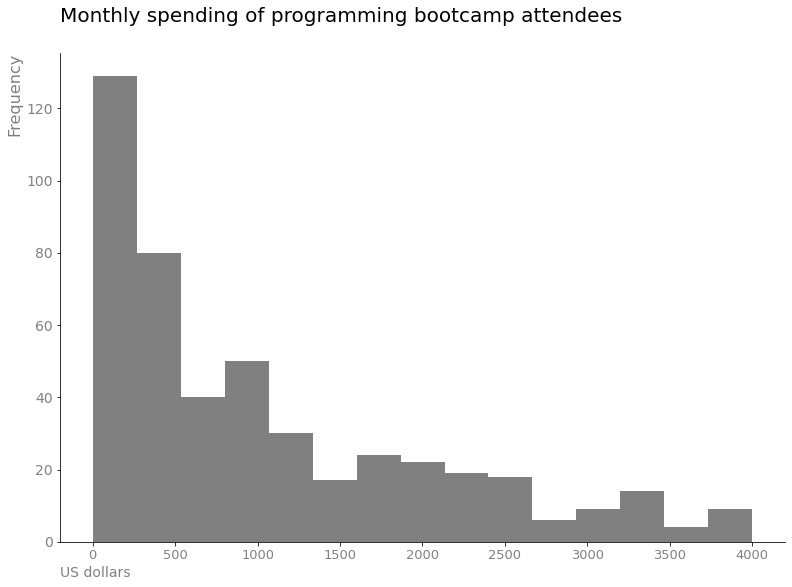

In [ ]:
fig, ax = plt.subplots(figsize = (13,9))
four_countries[group_a]["Monthly_spending"].plot.hist(bins = 15, color = "grey")
plt.gca().spines[["right","top"]].set_visible(False)
plt.title("Monthly spending of programming bootcamp attendees", loc="left", size = 20, y = 1.05)
plt.ylabel("Frequency", size = 16, color = "grey", loc = "top")
plt.xlabel("US dollars", size = 14, loc = "left", color = "grey")
plt.xticks(size = 13, color = "grey")
plt.yticks(size = 14, color = "grey")
plt.show()


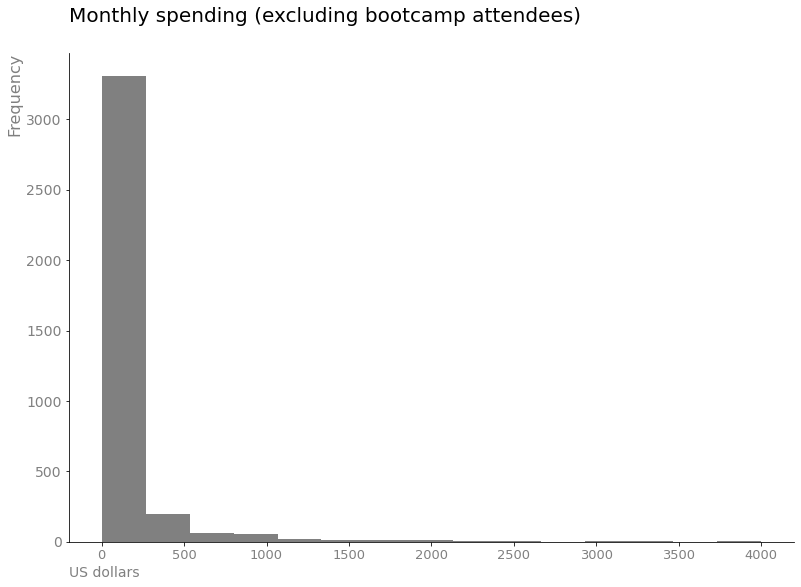

In [ ]:
fig, ax = plt.subplots(figsize = (13,9))
four_countries[group_b]["Monthly_spending"].plot.hist(bins = 15, color = "grey")
plt.gca().spines[["right","top"]].set_visible(False)
plt.title("Monthly spending (excluding bootcamp attendees)", loc="left", size = 20, y = 1.05)
plt.ylabel("Frequency", size = 16, color = "grey", loc = "top")
plt.xlabel("US dollars", size = 14, loc = "left", color = "grey")
plt.xticks(size = 13, color = "grey")
plt.yticks(size = 14, color = "grey")
plt.show()

### US, India, UK, and Canada
* The amount of respondents that reported spending over \$0 was greater than those that did not spend any money for learning
* Less than 8 % of respondents attended a programming bootcamp
* These programs cost money to attend, as expected 98 % survey participants that have not spent any money for learning did not attend a bootcamp, the other 2% may have used a loan
* 11 % of individuals that spent money for learning reported boot camp attendance, whereas the remaining 88 % did not attend one, presumably they spent it elsewhere on other platforms/resources


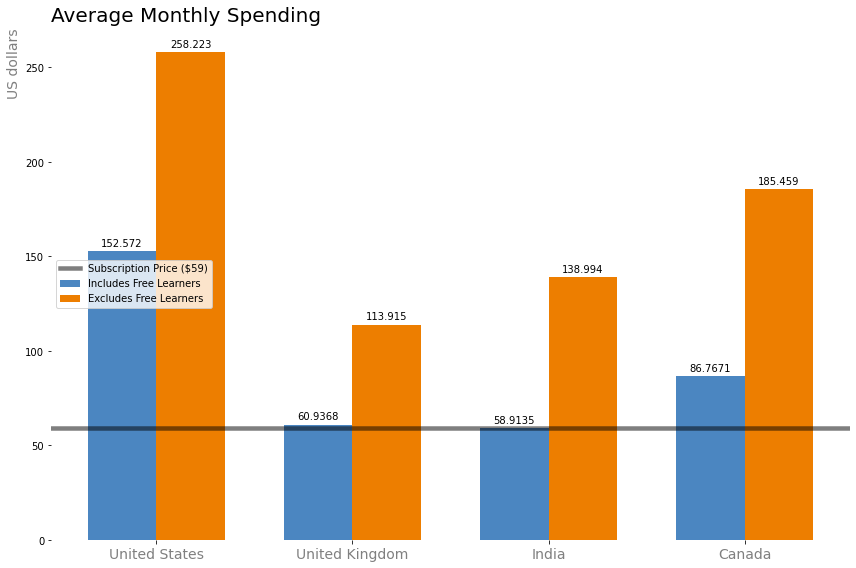

In [ ]:
# Isolate rows to include only monthly spending less than or equal to $4000
spending = spending[spending["Monthly_spending"] <= 4000]

# Monthly average spending by country
avg_month = spending.groupby("CountryLive").mean()
country_spends = avg_month["Monthly_spending"][["United States of America", "India","United Kingdom", "Canada"]].sort_index(ascending=False)

# Respondents that have spent money for learning, but did not attend a bootcamp
over_zero = four_countries[four_countries["Monthly_spending"] > 0].groupby("CountryLive")["Monthly_spending"].mean().sort_index(ascending=False)

labels = ["United States", "United Kingdom", "India", "Canada"]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (12, 8))
rects1 = ax.bar(x - width/2, country_spends, width, label="Includes Free Learners",color = "#4B86C1")
rects2 = ax.bar(x + width/2, over_zero, width, label= "Excludes Free Learners", color = "#ED7E00")
plt.axhline(59, color = "black", alpha = 0.5, label = "Subscription Price ($59)", linewidth = 4.5)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("US dollars", loc = "top", size = 14, color = "grey")
ax.set_title("Average Monthly Spending", size = 20, loc = "left")
ax.set_xticks(x, labels, size = 14, color = "grey")

ax.legend(loc = "center left")
ax.spines[["right", "left", "top", "bottom"]].set_visible(False)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

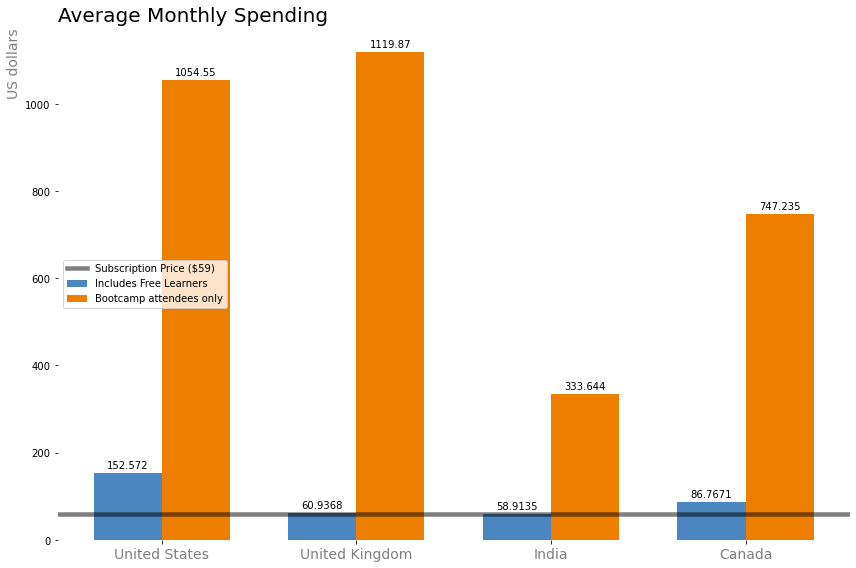

In [ ]:
# Isolate rows to include only monthly spending less than or equal to $4000
spending = spending[spending["Monthly_spending"] <= 4000]

# Monthly average spending by country
avg_month = spending.groupby("CountryLive").mean()
country_spends = avg_month["Monthly_spending"][["United States of America", "India","United Kingdom", "Canada"]].sort_index(ascending=False)

# Respondents that have spent money for learning, and did attend a bootcamp
over_zero_and_bootcamp = four_countries[group_a].groupby("CountryLive")["Monthly_spending"].mean().sort_index(ascending=False)

labels = ["United States", "United Kingdom", "India", "Canada"]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (12, 8))
rects1 = ax.bar(x - width/2, country_spends, width, label="Includes Free Learners",color = "#4B86C1")
rects2 = ax.bar(x + width/2, over_zero_and_bootcamp, width, label= "Bootcamp attendees only", color = "#ED7E00")
plt.axhline(59, color = "black", alpha = 0.5, label = "Subscription Price ($59)", linewidth = 4.5)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("US dollars", loc = "top", size = 14, color = "grey")
ax.set_title("Average Monthly Spending", size = 20, loc = "left")
ax.set_xticks(x, labels, size = 14, color = "grey")

ax.legend(loc = "center left")
ax.spines[["right", "left", "top", "bottom"]].set_visible(False)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

The United States should be our first choice for advertising:
* The US has the highest number of new programmers
* Highest average monthly spending for learning programming

India could be the second choice:
* Second highest number of new programmers
* India's average monthly spending is below our subscription price, as noted from both surveys, India has the second highest frequency of survey participation. This suggests that programming interest in India and the United States is higher than other countries, thus the potential number of customers is probably higher than in United Kingdom or Canada

## Conclusion
The analysis of freeCodeCamp's survey indicates that the United States should be the prime candidate for advertising based on the following criteria:
* Greatest number of new programmers
* Monthly spending is highest out of the English speaking countries

The second candidate can be India:
* Second highest number of new programmers
* Monthly spending is low, but there is potential for attracting new customers based off of the population density of India

We believe we explained *why* people are learning and practicing a new skill like programming. The information in this survey points to a desire for upward mobility, career advancement, and higher income. We demonstrated that the difference between current yearly salary from the expected salary was great enough to explain the decisions of survey participants. Many people indicated that they are interested in software/data science careers outside of the current one they have with an expectation of increased salary.

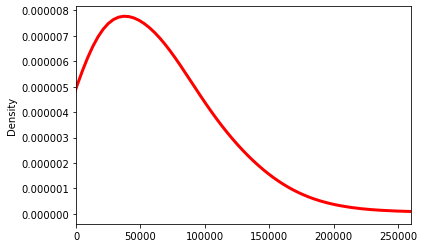

In [58]:
stk_exchange["ConvertedSalary"].plot.kde(xlim = (stk_exchange["ConvertedSalary"].min(), 260000), color = "green", linewidth = 3)
plt.ticklabel_format(style='plain')

In [46]:

stk_exchange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Respondent          98855 non-null  int64  
 1   Hobby               98855 non-null  object 
 2   OpenSource          98855 non-null  object 
 3   Country             98443 non-null  object 
 4   Student             94901 non-null  object 
 5   Employment          95321 non-null  object 
 6   FormalEducation     94703 non-null  object 
 7   UndergradMajor      79036 non-null  object 
 8   CompanySize         71531 non-null  object 
 9   DevType             92098 non-null  object 
 10  YearsCoding         93835 non-null  object 
 11  YearsCodingProf     77903 non-null  object 
 12  JobSatisfaction     69276 non-null  object 
 13  CareerSatisfaction  76504 non-null  object 
 14  HopeFiveYears       75718 non-null  object 
 15  JobSearchStatus     79488 non-null  object 
 16  Last

In [43]:
stk_exchange["Country"].value_counts()

United States      20309
India              13721
Germany             6459
United Kingdom      6221
Canada              3393
                   ...  
Sierra Leone           1
Saint Lucia            1
Solomon Islands        1
Grenada                1
Guinea-Bissau          1
Name: Country, Length: 183, dtype: int64

In [ ]:
stk_exchange

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,Gender,Age,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,25 - 34 years old,NaN,NaN,Monthly,NaN,KES
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Moderately dissatisfied,Neither satisfied nor dissatisfied,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,1.0,7.0,10.0,8.0,2.0,5.0,4.0,3.0,6.0,9.0,1.0,5.0,3.0,7.0,10.0,4.0,11.0,9.0,6.0,2.0,8.0,Male,35 - 44 years old,British pounds sterling (£),51000,Yearly,70841.0,GBP
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,6-8 years,Moderately satisfied,Moderately satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,18-20 years,12-14 years,Neither satisfied nor dissatisfied,Slightly dissatisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,35 - 44 years old,U.S. dollars ($),NaN,NaN,NaN,NaN
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,6-8 years,0-2 years,Slightly satisfied,Moderately satisfied,Working in a different or more specialized tec...,"I’m not actively looking, but I am open to new...",Between 1 and 2 years ago,8.0,5.0,7.0,1.0,2.0,6.0,4.0,3.0,10.0,9.0,1.0,10.0,2.0,4.0,8.0,3.0,11.0,7.0,5.0,9.0,6.0,Male,18 - 24 years old,South African rands (R),260000,Yearly,21426.0,ZAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98850,101513,Yes,Yes,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98851,101531,No,Yes,Spain,"Yes, full-time","Not employed, but looking for work",NaN,NaN,NaN,Back-end developer;Front-end developer,0-2 years,0-2 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98852,101541,Yes,Yes,India,"Yes, full-time",Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [60]:
stk_exchange["YearsCodingProf"].value_counts()

0-2 years           23421
3-5 years           21362
6-8 years           11385
9-11 years           7573
12-14 years          4287
15-17 years          3012
18-20 years          2830
21-23 years          1368
30 or more years     1302
24-26 years           857
27-29 years           506
Name: YearsCodingProf, dtype: int64

In [64]:
stk_exchange.groupby("YearsCodingProf")["ConvertedSalary"].mean().sort_values(ascending=False)

YearsCodingProf
27-29 years                  193,993.75
30 or more years             178,382.53
24-26 years                  167,094.75
21-23 years                  147,587.28
18-20 years                  144,937.31
15-17 years                  138,837.84
12-14 years                  124,085.45
9-11 years                   119,226.38
6-8 years                    102,862.68
3-5 years                     83,178.83
0-2 years                     59,750.51
Name: ConvertedSalary, dtype: float64

In [ ]:
four_countries["Monthly_spending"].median()

4.166666666666667

In [ ]:
spending[spending["CountryLive"].str.contains("United States of America|India|United Kingdom|Canada")]["Monthly_spending"].median()

4.166666666666667